Notebook to generate and plot L-R cellchat interaction members 

load in the d_fibXX datasets (used for the cell commns analysis and already with everything we need )


# Packages

In [1]:
library(tidyverse)
library(Seurat)
library(ComplexHeatmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching SeuratObject

Attaching sp

Loading required package: grid

ComplexHeatmap version 2.12.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This mess

# Data prep

In [2]:
d_fibWT <- readRDS("../RData/d_fibWT.rds")
d_fibA <- readRDS("../RData/d_fibA.rds")
d_fibAK <- readRDS("../RData/d_fibAK.rds")
d_fibAKP <- readRDS("../RData/d_fibAKP.rds")

In [5]:
print(d_fibWT)
head(d_fibWT@meta.data)
print(d_fibA)
head(d_fibA@meta.data)
print(d_fibAK)
head(d_fibAK@meta.data)
print(d_fibAKP)
head(d_fibAKP@meta.data)

An object of class Seurat 
40940 features across 3698 samples within 2 assays 
Active assay: SCT (20073 features, 10000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, phate


orig.ident  nCount_RNA nFeature_RNA mito_content
WT__AAACCCACAGCTTCCT-1 cocultWTFib 10761      3163         0.9478673   
WT__AAACCCAGTTCGAGCC-1 cocultWTFib 15485      3811         1.2334517   
WT__AAACGAAAGAAGGATG-1 cocultWTFib 16689      3775         1.2702978   
WT__AAACGAAAGGAAAGGT-1 cocultWTFib  5756      2126         1.4767199   
WT__AAACGAAAGTTAACGA-1 cocultWTFib 40330      4714         0.4512770   
WT__AAACGAACACCAGCTG-1 cocultWTFib 29829      5235         0.8917496   
                       rfp_content gfp_content nCount_SCT nFeature_SCT
WT__AAACCCACAGCTTCCT-1 0.009292817 0           17183      3206        
WT__AAACCCAGTTCGAGCC-1 0.000000000 0           17347      3811        
WT__AAACGAAAGAAGGATG-1 0.000000000 0           17508      3775        
WT__AAACGAAAGGAAAGGT-1 0.000000000 0           16159      2915        
WT__AAACGAAAGTTAACGA-1 0.000000000 0           18645      3719        
WT__AAACGAACACCAGCTG-1 0.003352442 0           18905      5016        
                       S.Score    G2M.Score    Phase          old.ident  
WT__AAACCCACAGCTTCCT-1 0.09172818 -0.035993356 Cycling        cocultWTFib
WT__AAACCCAGTTCGAGCC-1 0.04773247 -0.003213944 Cycling        cocultWTFib
WT__AAACGAAAGAAGGATG-1 0.04882882 -0.047011565 Cycling        cocultWTFib
WT__AAACGAAAGGAAAGGT-1 0.04299459 -0.003852567 Cycling        cocultWTFib
WT__AAACGAAAGTTAACGA-1 0.01198900 -0.003207270 Cycling        cocultWTFib
WT__AAACGAACACCAGCTG-1 0.31804191  0.452043743 Highly cycling cocultWTFib
                       CCDiff      SCT_snn_res.0.6 seurat_clusters
WT__AAACCCACAGCTTCCT-1  0.12772154 4               4              
WT__AAACCCAGTTCGAGCC-1  0.05094641 2               2              
WT__AAACGAAAGAAGGATG-1  0.09584038 2               2              
WT__AAACGAAAGGAAAGGT-1  0.04684716 9               9              
WT__AAACGAAAGTTAACGA-1  0.01519627 5               5              
WT__AAACGAACACCAGCTG-1 -0.13400183 7               7              
                       curatedCLUST       old.clust   finalPOPS         
WT__AAACCCACAGCTTCCT-1 NA                 fibroblast  fibroblast        
WT__AAACCCAGTTCGAGCC-1 NA                 fibroblast  fibroblast        
WT__AAACGAAAGAAGGATG-1 NA                 fibroblast  fibroblast        
WT__AAACGAAAGGAAAGGT-1 Late Absorptive    eAbsorptive Late Absorptive   
WT__AAACGAAAGTTAACGA-1 Transit Amplifying eStem       Transit Amplifying
WT__AAACGAACACCAGCTG-1 NA                 fibroblast  fibroblast

An object of class Seurat 
40964 features across 3646 samples within 2 assays 
Active assay: SCT (20041 features, 10000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, phate


orig.ident nCount_RNA nFeature_RNA mito_content
A__AAACCCACATCAGCTA-1 cocultAFib 30140      5339         0.6536165   
A__AAACCCAGTAGCTGCC-1 cocultAFib 10724      3016         0.8765386   
A__AAACCCAGTGAAGCGT-1 cocultAFib 22627      4461         0.7910903   
A__AAACGAATCTCCGTGT-1 cocultAFib 25643      4616         1.2869009   
A__AAACGAATCTGGGTCG-1 cocultAFib 10799      3189         1.5279193   
A__AAACGAATCTGTGCAA-1 cocultAFib 15058      3552         1.2285828   
                      rfp_content gfp_content nCount_SCT nFeature_SCT
A__AAACCCACATCAGCTA-1 0           0.000000000 19146      5103        
A__AAACCCAGTAGCTGCC-1 0           0.000000000 17554      3106        
A__AAACCCAGTGAAGCGT-1 0           0.000000000 18995      4460        
A__AAACGAATCTCCGTGT-1 0           0.089693094 18930      4562        
A__AAACGAATCTGGGTCG-1 0           0.009260117 17353      3245        
A__AAACGAATCTGTGCAA-1 0           0.019922965 17679      3552        
                      S.Score    G2M.Score     Phase          old.ident 
A__AAACCCACATCAGCTA-1 0.10937889  0.0068123143 Cycling        cocultAFib
A__AAACCCAGTAGCTGCC-1 0.06046197  0.0183596207 Cycling        cocultAFib
A__AAACCCAGTGAAGCGT-1 0.06348166 -0.0002316354 Cycling        cocultAFib
A__AAACGAATCTCCGTGT-1 0.20482048  0.2348381567 Highly cycling cocultAFib
A__AAACGAATCTGGGTCG-1 0.04288793  0.0180370446 Cycling        cocultAFib
A__AAACGAATCTGTGCAA-1 0.07810074 -0.0323652604 Cycling        cocultAFib
                      CCDiff      SCT_snn_res.0.6 seurat_clusters
A__AAACCCACATCAGCTA-1  0.10256658 1               1              
A__AAACCCAGTAGCTGCC-1  0.04210235 1               1              
A__AAACCCAGTGAAGCGT-1  0.06371330 4               4              
A__AAACGAATCTCCGTGT-1 -0.03001768 2               2              
A__AAACGAATCTGGGTCG-1  0.02485089 1               1              
A__AAACGAATCTGTGCAA-1  0.11046600 2               2              
                      curatedCLUST      old.clust  finalPOPS        
A__AAACCCACATCAGCTA-1 NA                fibroblast fibroblast       
A__AAACCCAGTAGCTGCC-1 NA                fibroblast fibroblast       
A__AAACCCAGTGAAGCGT-1 NA                fibroblast fibroblast       
A__AAACGAATCTCCGTGT-1 Stem (Oncogene) 1 eStem      Stem (Oncogene) 1
A__AAACGAATCTGGGTCG-1 NA                fibroblast fibroblast       
A__AAACGAATCTGTGCAA-1 Stem (Oncogene) 2 eStem      Stem (Oncogene) 2

An object of class Seurat 
39062 features across 3391 samples within 2 assays 
Active assay: SCT (19143 features, 10000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, phate


orig.ident  nCount_RNA nFeature_RNA mito_content
AK__AAACCCACACACCTAA-1 cocultAKFib 21674      4581         1.2226631   
AK__AAACCCATCGGTAAGG-1 cocultAKFib 19452      4021         0.8842278   
AK__AAACGAACAAGGAGTC-1 cocultAKFib 23442      3834         1.0707278   
AK__AAACGCTCAGGCTACC-1 cocultAKFib 21989      3837         0.6230388   
AK__AAACGCTTCAGGACGA-1 cocultAKFib 14921      3054         0.7506199   
AK__AAAGAACAGTTTCTTC-1 cocultAKFib 13127      3532         0.8532033   
                       rfp_content gfp_content nCount_SCT nFeature_SCT
AK__AAACCCACACACCTAA-1 0           0.00000000  17309      4572        
AK__AAACCCATCGGTAAGG-1 0           0.00000000  17182      4021        
AK__AAACGAACAAGGAGTC-1 0           0.03412678  16865      3803        
AK__AAACGCTCAGGCTACC-1 0           0.03638183  16907      3820        
AK__AAACGCTTCAGGACGA-1 0           0.07372160  16178      3054        
AK__AAAGAACAGTTTCTTC-1 0           0.00000000  15652      3531        
                       S.Score    G2M.Score   Phase          old.ident  
AK__AAACCCACACACCTAA-1 0.11957205  0.09710126 Cycling        cocultAKFib
AK__AAACCCATCGGTAAGG-1 0.03340075 -0.04068207 Cycling        cocultAKFib
AK__AAACGAACAAGGAGTC-1 0.02562704 -0.01532658 Cycling        cocultAKFib
AK__AAACGCTCAGGCTACC-1 0.01033421  0.02012974 Highly cycling cocultAKFib
AK__AAACGCTTCAGGACGA-1 0.01455736 -0.05430904 Cycling        cocultAKFib
AK__AAAGAACAGTTTCTTC-1 0.03331856 -0.01601149 Cycling        cocultAKFib
                       CCDiff       SCT_snn_res.0.6 seurat_clusters
AK__AAACCCACACACCTAA-1  0.022470783 5               5              
AK__AAACCCATCGGTAAGG-1  0.074082820 2               2              
AK__AAACGAACAAGGAGTC-1  0.040953622 4               4              
AK__AAACGCTCAGGCTACC-1 -0.009795526 4               4              
AK__AAACGCTTCAGGACGA-1  0.068866403 3               3              
AK__AAAGAACAGTTTCTTC-1  0.049330057 1               1              
                       curatedCLUST       old.clust  finalPOPS         
AK__AAACCCACACACCTAA-1 NA                 fibroblast fibroblast        
AK__AAACCCATCGGTAAGG-1 NA                 fibroblast fibroblast        
AK__AAACGAACAAGGAGTC-1 Transit Amplifying eAbsPO     Transit Amplifying
AK__AAACGCTCAGGCTACC-1 Stem (Oncogene) 2  eAbsPO     Stem (Oncogene) 2 
AK__AAACGCTTCAGGACGA-1 Stem (Oncogene) 2  eSecO      Stem (Oncogene) 2 
AK__AAAGAACAGTTTCTTC-1 NA                 fibroblast fibroblast

An object of class Seurat 
40650 features across 3811 samples within 2 assays 
Active assay: SCT (19864 features, 10000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, phate


orig.ident   nCount_RNA nFeature_RNA mito_content
AKP__AAACCCATCTGCCTCA-1 cocultAKPFib 31190      5802         1.8146842   
AKP__AAACGCTAGACAGTCG-1 cocultAKPFib 10765      3176         1.0589875   
AKP__AAACGCTCAAGGCAAC-1 cocultAKPFib 21227      3761         1.0929477   
AKP__AAACGCTCATGCAGGA-1 cocultAKPFib 18065      4278         0.9299751   
AKP__AAACGCTGTTCCGTTC-1 cocultAKPFib 24128      4418         0.9035146   
AKP__AAACGCTTCACGAGGA-1 cocultAKPFib 41052      5197         0.8355257   
                        rfp_content gfp_content nCount_SCT nFeature_SCT
AKP__AAACCCATCTGCCTCA-1 0.000000000 0.00000000  19517      5565        
AKP__AAACGCTAGACAGTCG-1 0.000000000 0.20436600  17445      3237        
AKP__AAACGCTCAAGGCAAC-1 0.000000000 0.18372827  18486      3761        
AKP__AAACGCTCATGCAGGA-1 0.005535566 0.00000000  18064      4278        
AKP__AAACGCTGTTCCGTTC-1 0.000000000 0.01657825  18457      4406        
AKP__AAACGCTTCACGAGGA-1 0.000000000 0.08769366  18027      4415        
                        S.Score      G2M.Score   Phase          old.ident   
AKP__AAACCCATCTGCCTCA-1  0.088306482 -0.03213231 Cycling        cocultAKPFib
AKP__AAACGCTAGACAGTCG-1  0.198828266  0.23924246 Highly cycling cocultAKPFib
AKP__AAACGCTCAAGGCAAC-1  0.001281071 -0.04618247 Cycling        cocultAKPFib
AKP__AAACGCTCATGCAGGA-1  0.069505067 -0.01366007 Cycling        cocultAKPFib
AKP__AAACGCTGTTCCGTTC-1 -0.019973516 -0.07691013 Other          cocultAKPFib
AKP__AAACGCTTCACGAGGA-1  0.108501926  0.25866935 Highly cycling cocultAKPFib
                        CCDiff      SCT_snn_res.0.6 seurat_clusters
AKP__AAACCCATCTGCCTCA-1  0.12043879 2               2              
AKP__AAACGCTAGACAGTCG-1 -0.04041419 3               3              
AKP__AAACGCTCAAGGCAAC-1  0.04746354 4               4              
AKP__AAACGCTCATGCAGGA-1  0.08316514 6               6              
AKP__AAACGCTGTTCCGTTC-1  0.05693661 5               5              
AKP__AAACGCTTCACGAGGA-1 -0.15016743 4               4              
                        curatedCLUST      old.clust  finalPOPS        
AKP__AAACCCATCTGCCTCA-1 NA                fibroblast fibroblast       
AKP__AAACGCTAGACAGTCG-1 Stem (Oncogene) 1 eSecOE     Stem (Oncogene) 1
AKP__AAACGCTCAAGGCAAC-1 Early Absorptive  eStemOE    Early Absorptive 
AKP__AAACGCTCATGCAGGA-1 NA                fibroblast fibroblast       
AKP__AAACGCTGTTCCGTTC-1 Early Absorptive  eSecPOE    Early Absorptive 
AKP__AAACGCTTCACGAGGA-1 Stem (Oncogene) 1 eStemOE    Stem (Oncogene) 1

Warning message:
“Removed 2 rows containing missing values (geom_hline).”
Warning message:
“Removed 2 rows containing missing values (geom_hline).”
Warning message:
“Removed 2 rows containing missing values (geom_hline).”
Warning message:
“Removed 2 rows containing missing values (geom_hline).”


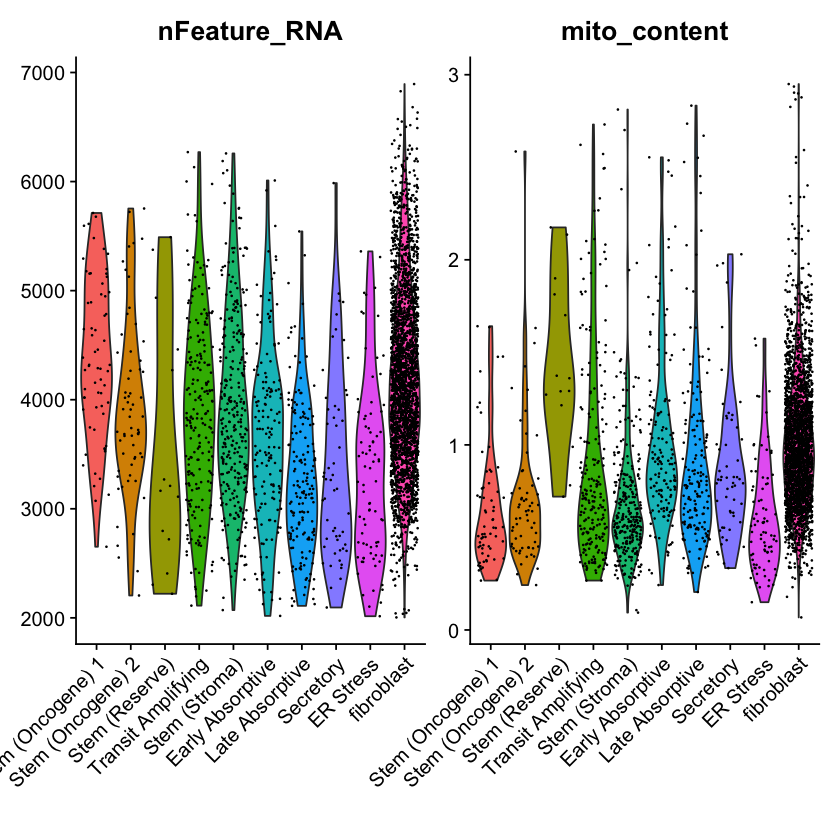

Warning message:
“Removed 2 rows containing missing values (geom_hline).”
Warning message:
“Removed 2 rows containing missing values (geom_hline).”


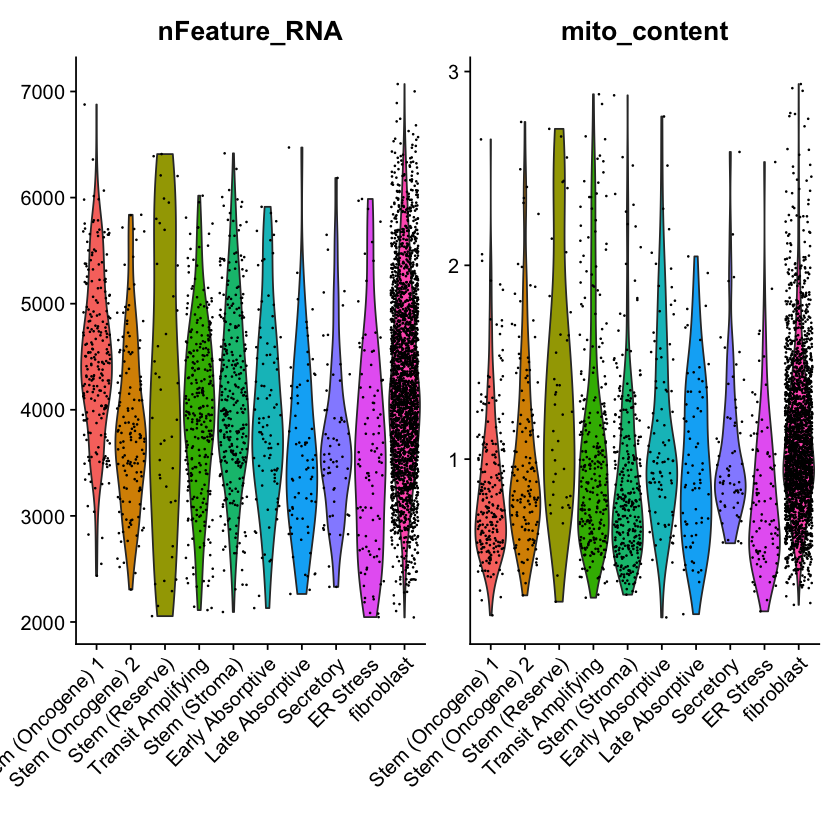

Warning message:
“Removed 2 rows containing missing values (geom_hline).”
Warning message:
“Removed 2 rows containing missing values (geom_hline).”


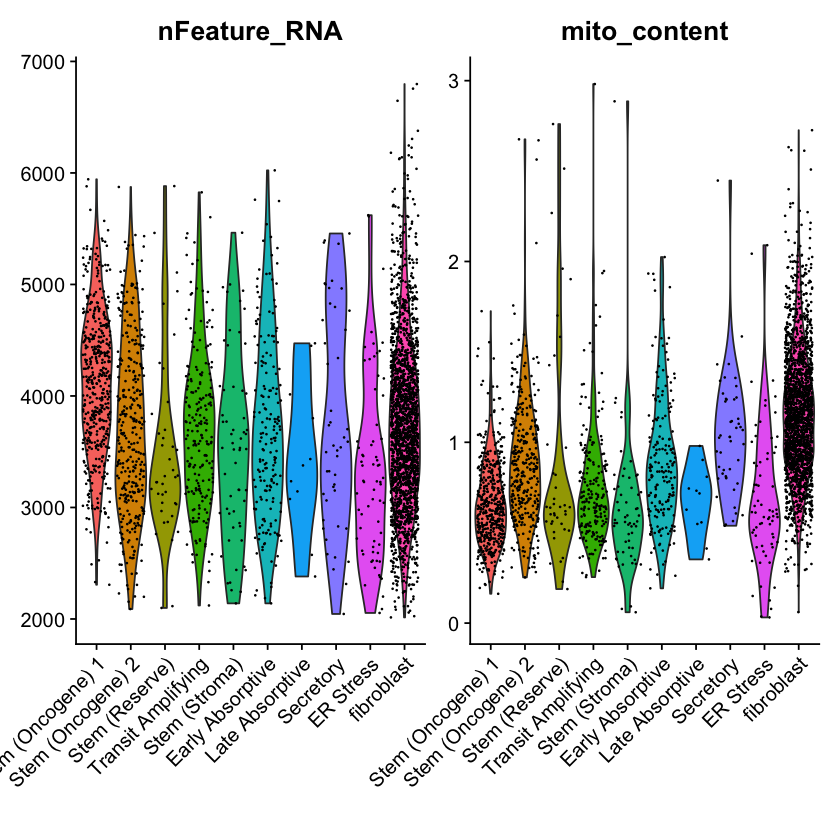

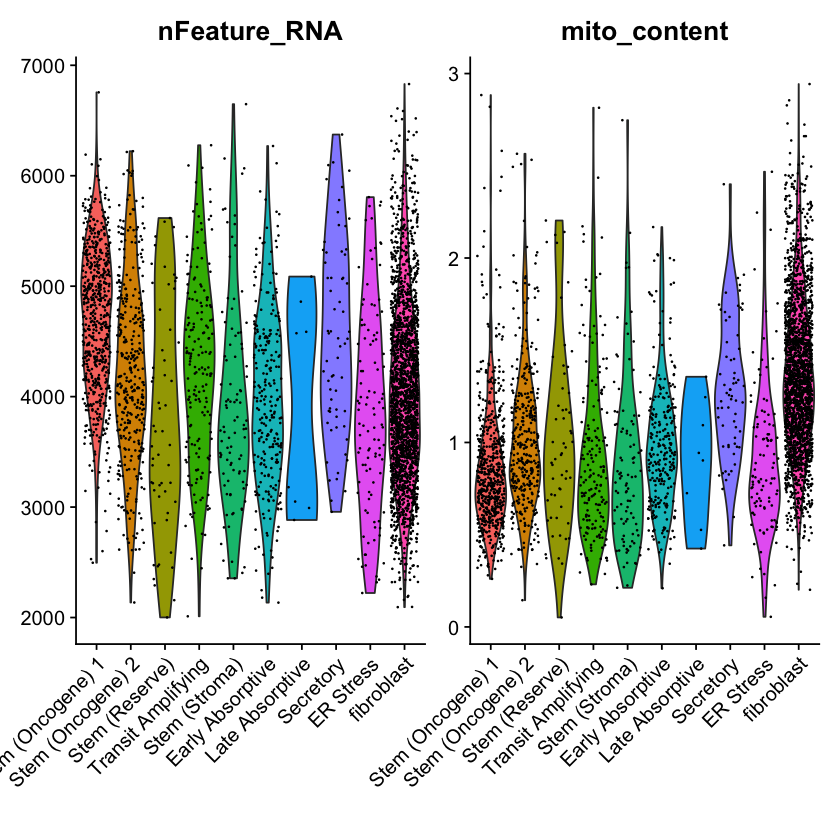

In [7]:
VlnPlot(d_fibWT, features = c("nFeature_RNA", "mito_content"),
        ncol = 2, assay = "RNA", group.by = "finalPOPS", stack = FALSE) &
    xlab("") &
    geom_hline(yintercept = c(2000, 7600), col="red")

VlnPlot(d_fibA, features = c("nFeature_RNA", "mito_content"),
        ncol = 2, assay = "RNA", group.by = "finalPOPS", stack = FALSE) &
    xlab("") &
    geom_hline(yintercept = c(2000, 7600), col="red")

VlnPlot(d_fibAK, features = c("nFeature_RNA", "mito_content"),
        ncol = 2, assay = "RNA", group.by = "finalPOPS", stack = FALSE) &
    xlab("") &
    geom_hline(yintercept = c(2000, 7600), col="red")

VlnPlot(d_fibAKP, features = c("nFeature_RNA", "mito_content"),
        ncol = 2, assay = "RNA", group.by = "finalPOPS", stack = FALSE) &
    xlab("") &
    geom_hline(yintercept = c(2000, 7600), col="red")

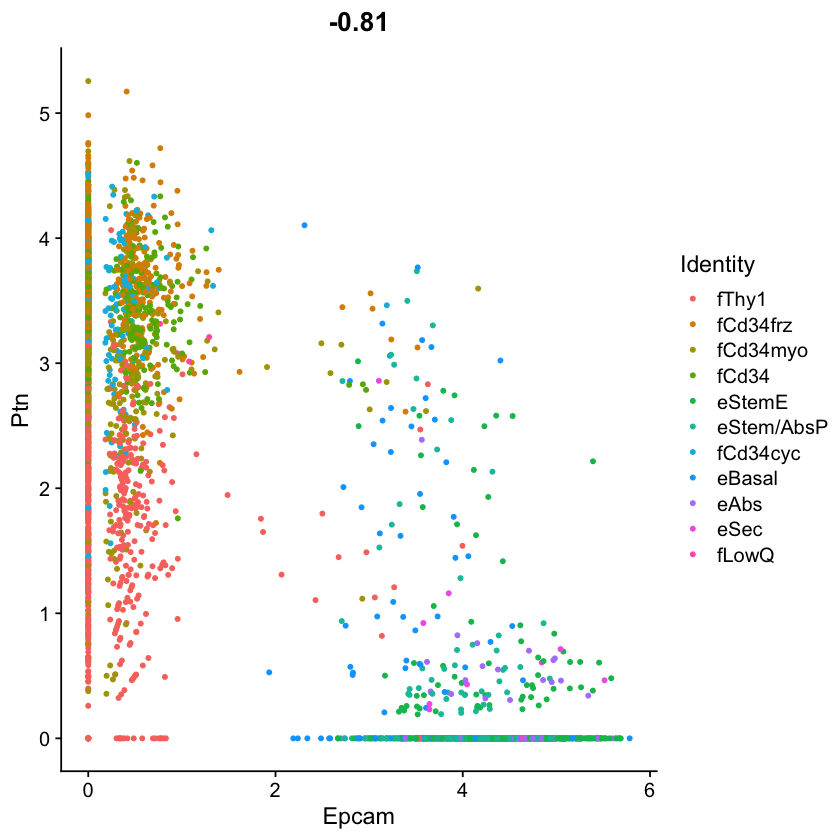

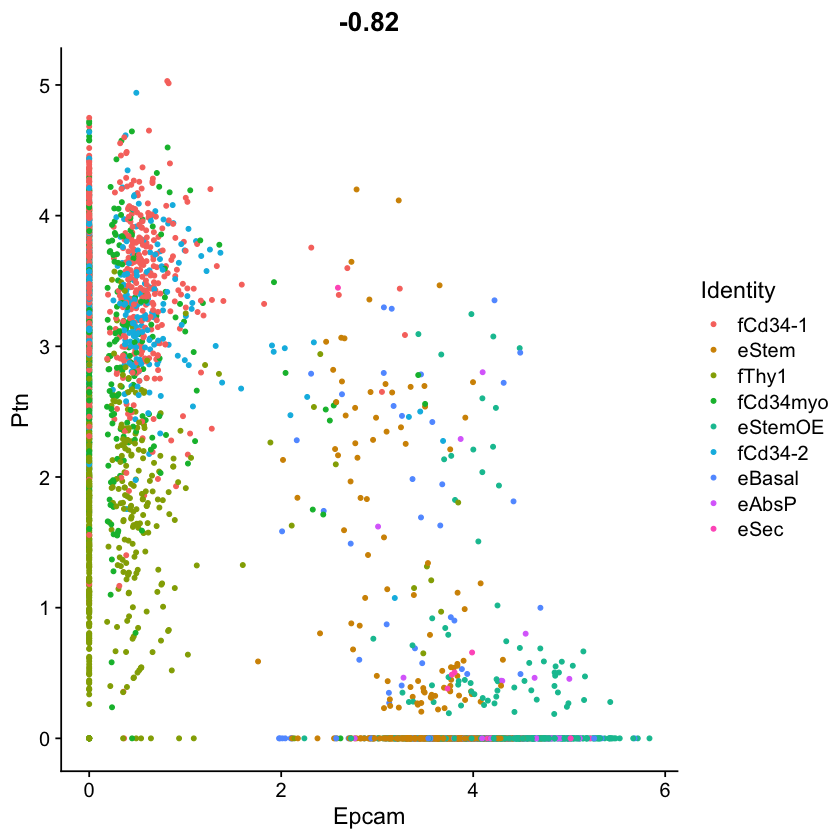

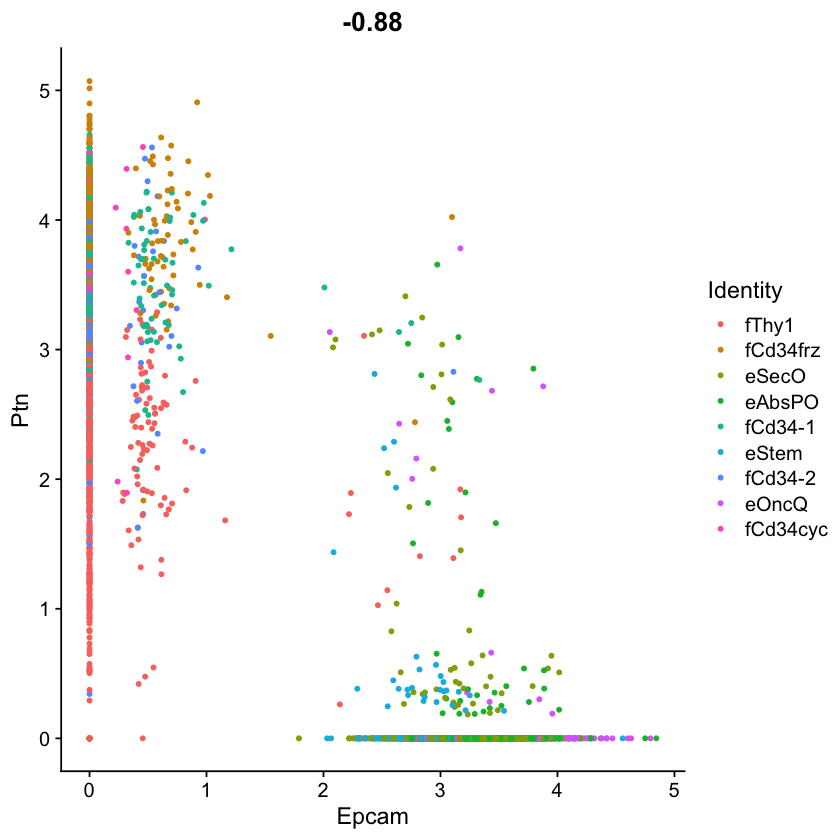

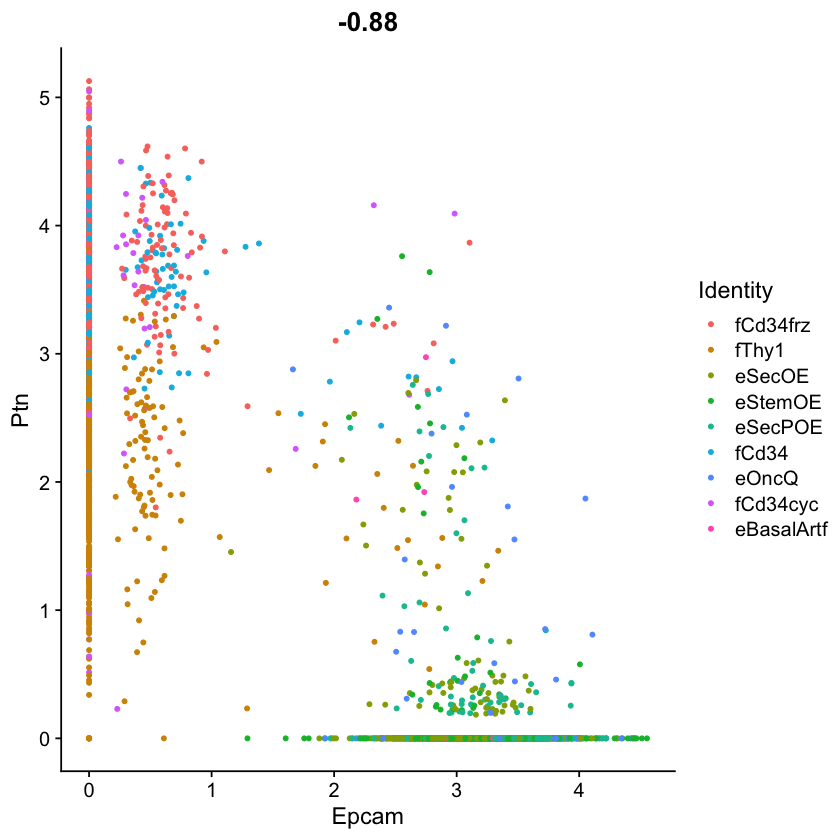

In [10]:
#Correlation of EPI and fibro markers
d_fibWT@active.assay <- "RNA"
FeatureScatter(d_fibWT, feature1="Epcam", feature2="Ptn", shuffle = TRUE)

d_fibA@active.assay <- "RNA"
FeatureScatter(d_fibA, feature1="Epcam", feature2="Ptn", shuffle = TRUE)

d_fibAK@active.assay <- "RNA"
FeatureScatter(d_fibAK, feature1="Epcam", feature2="Ptn", shuffle = TRUE)

d_fibAKP@active.assay <- "RNA"
FeatureScatter(d_fibAKP, feature1="Epcam", feature2="Ptn", shuffle = TRUE)

# Integration

In [3]:
INTccWT_list <- c(d_fibWT, d_fibA, d_fibAK, d_fibAKP)

for (i in 1:length(INTccWT_list)) {
    print(INTccWT_list[[i]]@project.name)
    print(summary(as.data.frame(INTccWT_list[[i]]@assays$RNA@data))[,1:3])
    #The scale.data slot is empty for the second seq run datasets!
}

[1] "cocultWTFib"
 WT__AAACCCACAGCTTCCT-1 WT__AAACCCAGTTCGAGCC-1 WT__AAACGAAAGAAGGATG-1
 Min.   :0.0000         Min.   :0.0000         Min.   :0.0000        
 1st Qu.:0.0000         1st Qu.:0.0000         1st Qu.:0.0000        
 Median :0.0000         Median :0.0000         Median :0.0000        
 Mean   :0.1573         Mean   :0.1607         Mean   :0.1572        
 3rd Qu.:0.0000         3rd Qu.:0.0000         3rd Qu.:0.0000        
 Max.   :5.6826         Max.   :5.9023         Max.   :6.1967        
[1] "cocultAFib"
 A__AAACCCACATCAGCTA-1 A__AAACCCAGTAGCTGCC-1 A__AAACCCAGTGAAGCGT-1
 Min.   :0.0000        Min.   :0.0000        Min.   :0.0000       
 1st Qu.:0.0000        1st Qu.:0.0000        1st Qu.:0.0000       
 Median :0.0000        Median :0.0000        Median :0.0000       
 Mean   :0.1767        Mean   :0.1474        Mean   :0.1691       
 3rd Qu.:0.2865        3rd Qu.:0.0000        3rd Qu.:0.0000       
 Max.   :6.4698        Max.   :6.9296        Max.   :6.2163       
[1] "c

In [4]:
for (i in 1:length(INTccWT_list)) {
    INTccWT_list[[i]] <- NormalizeData(
                            INTccWT_list[[i]],
                            assay="RNA",
                            normalization.method = "LogNormalize",
                            scale.factor = 10000
    )
    print(summary(as.data.frame(INTccWT_list[[i]]@assays$RNA@data))[,1:3])
}

 WT__AAACCCACAGCTTCCT-1 WT__AAACCCAGTTCGAGCC-1 WT__AAACGAAAGAAGGATG-1
 Min.   :0.0000         Min.   :0.0000         Min.   :0.0000        
 1st Qu.:0.0000         1st Qu.:0.0000         1st Qu.:0.0000        
 Median :0.0000         Median :0.0000         Median :0.0000        
 Mean   :0.1573         Mean   :0.1607         Mean   :0.1572        
 3rd Qu.:0.0000         3rd Qu.:0.0000         3rd Qu.:0.0000        
 Max.   :5.6826         Max.   :5.9023         Max.   :6.1967        
 A__AAACCCACATCAGCTA-1 A__AAACCCAGTAGCTGCC-1 A__AAACCCAGTGAAGCGT-1
 Min.   :0.0000        Min.   :0.0000        Min.   :0.0000       
 1st Qu.:0.0000        1st Qu.:0.0000        1st Qu.:0.0000       
 Median :0.0000        Median :0.0000        Median :0.0000       
 Mean   :0.1767        Mean   :0.1474        Mean   :0.1691       
 3rd Qu.:0.2865        3rd Qu.:0.0000        3rd Qu.:0.0000       
 Max.   :6.4698        Max.   :6.9296        Max.   :6.2163       
 AK__AAACCCACACACCTAA-1 AK__AAACCCATCGGTA

SCT assays

In [5]:
for (i in 1:length(INTccWT_list)) {
    INTccWT_list[[i]] <- SCTransform(INTccWT_list[[i]],
                                        new.assay.name = "SCT", 
                                        vars.to.regress = "mito_content",
                                        variable.features.n = 10000)}

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 19955 by 3698

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3698 cells



  |======================================================================| 100%


Found 93 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 19955 genes



  |======================================================================| 100%


Computing corrected count matrix for 19955 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 33.288 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mito_content

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 19854 by 3646

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3646 cells



  |======================================================================| 100%


Found 81 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 19854 genes



  |======================================================================| 100%


Computing corrected count matrix for 19854 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 32.76431 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mito_content

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 18988 by 3391

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3391 cells



  |======================================================================| 100%


Found 79 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 18988 genes



  |======================================================================| 100%


Computing corrected count matrix for 18988 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 29.59214 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mito_content

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 19614 by 3811

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3811 cells



  |======================================================================| 100%


Found 93 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 19614 genes



  |======================================================================| 100%


Computing corrected count matrix for 19614 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 33.82447 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mito_content

Centering data matrix

Set default assay to SCT



In [6]:
cc_genes <- read_tsv("../../../../D_CommonDatasets/CellCycle_geneSet.txt")
s.features  <- na.omit(cc_genes$s) %>% str_to_sentence()
g2m.features <- na.omit(cc_genes$g2m) %>% str_to_sentence()
g1.features <- na.omit(cc_genes$g1) %>% str_to_sentence()
g1s.features <- unique(c(s.features, g1.features))
g1s.features <- setdiff(g1s.features, g2m.features)

New names:
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
Rows: 248 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): s, g2m, g1
lgl (3): ...4, ...5, ...6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
for (i in 1:length(INTccWT_list)) {
    INTccWT_list[[i]] <- CellCycleScoring(INTccWT_list[[i]], 
                                            s.features = g1s.features, 
                                            g2m.features = g2m.features, 
                                            assay="SCT", set.ident = TRUE)
    INTccWT_list[[i]]$Phase <- recode(INTccWT_list[[i]]$Phase, G1="Other", 
                                        S="Cycling", G2M="Highly cycling")
}

Warning message:
“The following features are not present in the object: Ccdc150, Gm13547, Mlf1ip, 1700009n14rik, 2700049a03rik, Bc048507, Gm45713, Gm49369, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Cfd, Gm10184, Gm28635, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Ccdc150, Gm13547, Mlf1ip, 1700009n14rik, 2700049a03rik, Bc048507, Gm45713, Gm49369, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Cfd, Gm28635, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Ccdc150, Gm13547, Mlf1ip, 1700009n14rik, 2700049a03rik, Bc048507, Gm45713, Gm49369, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Cfd, Gm28635, not searching for symbol synonyms”
Warning message:
“The following features are not presen

In [8]:
for (i in 1:length(INTccWT_list)) {
    INTccWT_list[[i]]$CCDiff <- INTccWT_list[[i]]$S.Score - INTccWT_list[[i]]$G2M.Score
    INTccWT_list[[i]] <- SCTransform(INTccWT_list[[i]], 
                                        new.assay.name = "SCT", 
                                        vars.to.regress = c("mito_content",
                                                            "CCDiff"),
                                        variable.features.n = 10000)}

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 19955 by 3698

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3698 cells



  |======================================================================| 100%


Found 93 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 19955 genes



  |======================================================================| 100%


Computing corrected count matrix for 19955 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 32.41235 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mito_content, CCDiff

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 19854 by 3646

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3646 cells



  |======================================================================| 100%


Found 81 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 19854 genes



  |======================================================================| 100%


Computing corrected count matrix for 19854 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 32.75947 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mito_content, CCDiff

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 18988 by 3391

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3391 cells



  |======================================================================| 100%


Found 79 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 18988 genes



  |======================================================================| 100%


Computing corrected count matrix for 18988 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 30.13233 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mito_content, CCDiff

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 19614 by 3811

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3811 cells



  |======================================================================| 100%


Found 93 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 19614 genes



  |======================================================================| 100%


Computing corrected count matrix for 19614 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 33.73502 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out mito_content, CCDiff

Centering data matrix

Set default assay to SCT



In [9]:
saveRDS(INTccWT_list, "../RData/INTccWT_list.rds")

In [2]:
INTccWT_list <- readRDS("../RData/INTccWT_list.rds")

Integrate

In [3]:
INTccWT_feats <- SelectIntegrationFeatures(object.list=INTccWT_list, 
                                            nfeatures =3000)
INTccWT_list <- PrepSCTIntegration(object.list=INTccWT_list, 
                                    anchor.features=INTccWT_feats)
INTccWT_list <- lapply(X = INTccWT_list,
                        FUN = RunPCA,
                        features = INTccWT_feats,
                        assay = "SCT", reduction.name="pca")

PC_ 1 
Positive:  Ifitm3, Dcn, Ptn, Saa3, Mt1, Spp1, Timp1, Ifitm2, Igfbp7, Ccl2 
	   Lcn2, Mt2, Mgp, Cebpb, Ifi27l2a, Ccl7, Rasl11a, Cebpd, Serpine2, Cd302 
	   Hp, Cxcl12, Col3a1, Tmem176b, Pcolce, Sparc, Ctsl, Emp3, Bgn, Col1a1 
Negative:  Epcam, Krt8, Lgals4, Cldn7, Krt18, Krt19, Cystm1, Lgals2, Krt7, Phgr1 
	   S100a14, Crip1, S100a6, 2200002D01Rik, Pglyrp1, Tmsb10, Tspan8, Cldn3, Spint2, Ezr 
	   Gsta4, Msln, Mgst3, S100a11, Ifi27l2b, Anxa3, S100a10, Cldn4, Lgals3, Serpinb1a 
PC_ 2 
Positive:  Dcn, Ptn, Pclaf, Rbp1, Birc5, Stmn1, Rhox5, Cthrc1, Csrp2, Il33 
	   Tyms, Ptgis, Ube2c, Rps11, Rpl18, Dlk1, Hmgb2, Cenpm, Sfrp1, Igfbp5 
	   Tmem176b, Cenpa, Spc24, Tk1, Rpl22l1, Top2a, Rps8, Rps2, Dut, Mgp 
Negative:  Ifitm1, Ifi27l2a, Ifitm3, Hgf, Ly6c1, Ctsl, Ifitm2, Sod2, S100a4, Ccl2 
	   Grem1, Slpi, Cebpd, Prkg2, H2bc4, Vcan, Gdpd2, Isg15, Mt2, Ereg 
	   Ifitm6, Mt1, Ly6a, Tslp, Ppp1r14a, Nupr1, Lmo4, Tmem167, Cebpb, Cxcl1 
PC_ 3 
Positive:  Prkg2, Pclaf, Spp1, Ifitm1, Stmn1, Birc5,

In [4]:
INTccWT_anchors <- FindIntegrationAnchors(INTccWT_list, normalization.method = "SCT",
                                        anchor.features = INTccWT_feats,
                                        reduction = "rpca", k.anchor = 12)

Computing within dataset neighborhoods

Finding all pairwise anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 20646 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 11639 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 12855 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 11814 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 12783 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 18883 anchors



In [5]:
INTccWT <- IntegrateData(anchorset = INTccWT_anchors, 
                                normalization.method = "SCT")

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 into 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 4 3 into 1 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [2]:
INTccWT <- readRDS("../RData/INTccWT.rds")

In [3]:
head(INTccWT@meta.data)

orig.ident  nCount_RNA nFeature_RNA mito_content
WT__AAACCCACAGCTTCCT-1 cocultWTFib 10761      3163         0.9478673   
WT__AAACCCAGTTCGAGCC-1 cocultWTFib 15485      3811         1.2334517   
WT__AAACGAAAGAAGGATG-1 cocultWTFib 16689      3775         1.2702978   
WT__AAACGAAAGGAAAGGT-1 cocultWTFib  5756      2126         1.4767199   
WT__AAACGAAAGTTAACGA-1 cocultWTFib 40330      4714         0.4512770   
WT__AAACGAACACCAGCTG-1 cocultWTFib 29829      5235         0.8917496   
                       rfp_content gfp_content nCount_SCT nFeature_SCT
WT__AAACCCACAGCTTCCT-1 0.009292817 0           17505      3210        
WT__AAACCCAGTTCGAGCC-1 0.000000000 0           17665      3811        
WT__AAACGAAAGAAGGATG-1 0.000000000 0           17764      3775        
WT__AAACGAAAGGAAAGGT-1 0.000000000 0           16412      2955        
WT__AAACGAAAGTTAACGA-1 0.000000000 0           19005      3762        
WT__AAACGAACACCAGCTG-1 0.003352442 0           19108      5041        
                       S.Score     G2M.Score     Phase          old.ident
WT__AAACCCACAGCTTCCT-1 0.091843066 -3.454633e-02 Cycling        fCd34    
WT__AAACCCAGTTCGAGCC-1 0.046962944 -9.039022e-05 Cycling        fCd34frz 
WT__AAACGAAAGAAGGATG-1 0.046281164 -4.622849e-02 Cycling        fCd34frz 
WT__AAACGAAAGGAAAGGT-1 0.041873413 -5.465700e-03 Cycling        eAbs     
WT__AAACGAAAGTTAACGA-1 0.009359052  7.385860e-03 Cycling        eStemE   
WT__AAACGAACACCAGCTG-1 0.316454554  4.528177e-01 Highly cycling fCd34cyc 
                       CCDiff       SCT_snn_res.0.6 seurat_clusters
WT__AAACCCACAGCTTCCT-1  0.126389393 4               4              
WT__AAACCCAGTTCGAGCC-1  0.047053334 2               2              
WT__AAACGAAAGAAGGATG-1  0.092509653 2               2              
WT__AAACGAAAGGAAAGGT-1  0.047339114 9               9              
WT__AAACGAAAGTTAACGA-1  0.001973191 5               5              
WT__AAACGAACACCAGCTG-1 -0.136363190 7               7              
                       curatedCLUST       old.clust   finalPOPS         
WT__AAACCCACAGCTTCCT-1 NA                 fibroblast  fibroblast        
WT__AAACCCAGTTCGAGCC-1 NA                 fibroblast  fibroblast        
WT__AAACGAAAGAAGGATG-1 NA                 fibroblast  fibroblast        
WT__AAACGAAAGGAAAGGT-1 Late Absorptive    eAbsorptive Late Absorptive   
WT__AAACGAAAGTTAACGA-1 Transit Amplifying eStem       Transit Amplifying
WT__AAACGAACACCAGCTG-1 NA                 fibroblast  fibroblast

In [4]:
INTccWT <- RunPCA(INTccWT, assay="integrated", reduction.name="pca")

PC_ 1 
Positive:  Ifitm3, Dcn, Saa3, Ptn, Mt1, Spp1, Ccl2, Timp1, Ifitm2, Ifi27l2a 
	   Mt2, Lcn2, Igfbp7, Cebpb, Cebpd, Ccl7, Rasl11a, Serpine2, Mgp, Ctsl 
	   Cd302, Pcolce, Cxcl12, Sparc, Hp, Col3a1, Cxcl1, Sod2, Ly6c1, Bgn 
Negative:  Epcam, Lgals4, Krt8, Krt18, Cldn7, Krt19, Lgals2, Cystm1, Phgr1, Krt7 
	   S100a14, Crip1, Pglyrp1, S100a6, Tspan8, Gsta4, Gpx2, 2200002D01Rik, Tmsb10, Spint2 
	   Gm43305, Cldn3, Msln, Ezr, Mgst3, Rab25, Anxa3, Ifi27l2b, Fxyd3, Tpd52 
PC_ 2 
Positive:  Dcn, Pclaf, Ptn, Birc5, Hmgb2, Ube2c, Rps2, Stmn1, Cenpm, Cenpa 
	   Hspd1, Npm1, Spc24, Tk1, Csrp2, Rps8, Cdca8, Il33, Hspe1, Rbp1 
	   Rps11, Dut, Rpl18, Ccna2, Tyms, Rhox5, Tmem176b, Cdca3, Top2a, Ran 
Negative:  Ifitm1, Ifi27l2a, Hgf, Ctsl, Ly6c1, Ifitm3, H2bc4, S100a4, Prkg2, Ifitm2 
	   Sod2, Cldn4, Grem1, Gdpd2, Vcan, Ccl2, Ereg, Nupr1, Cebpd, Slpi 
	   Lgals3, Isg15, Ifitm6, Ppp1r14a, Ly6a, Ero1l, S100a11, AA467197, Mt2, Cldn3 
PC_ 3 
Positive:  Dcn, Ptn, Clu, Gas6, Cldn4, Il33, Tmem176b, Serpi

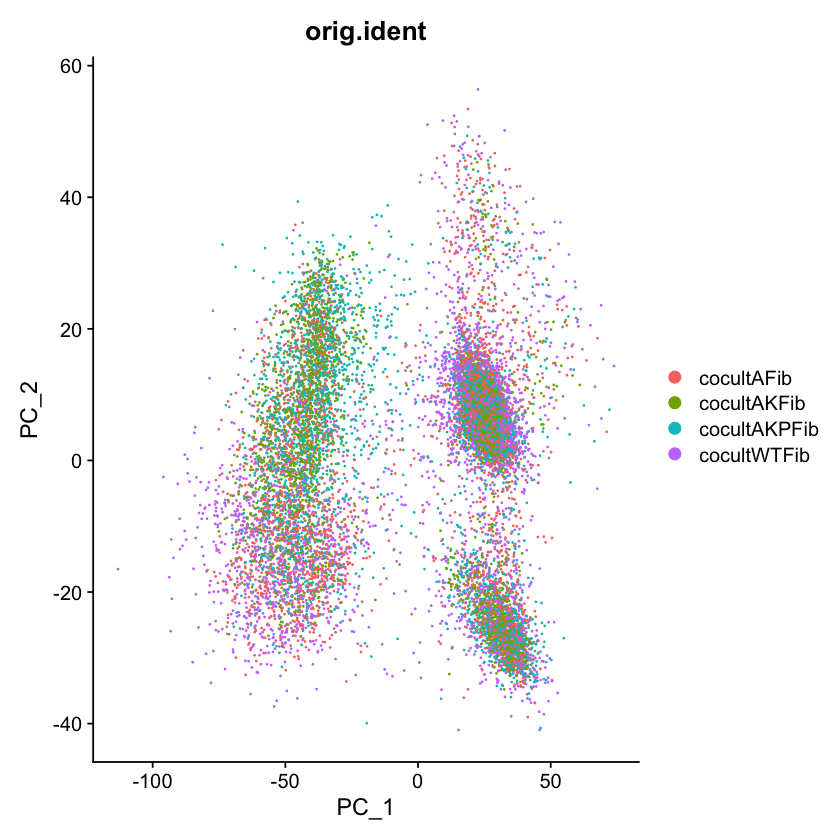

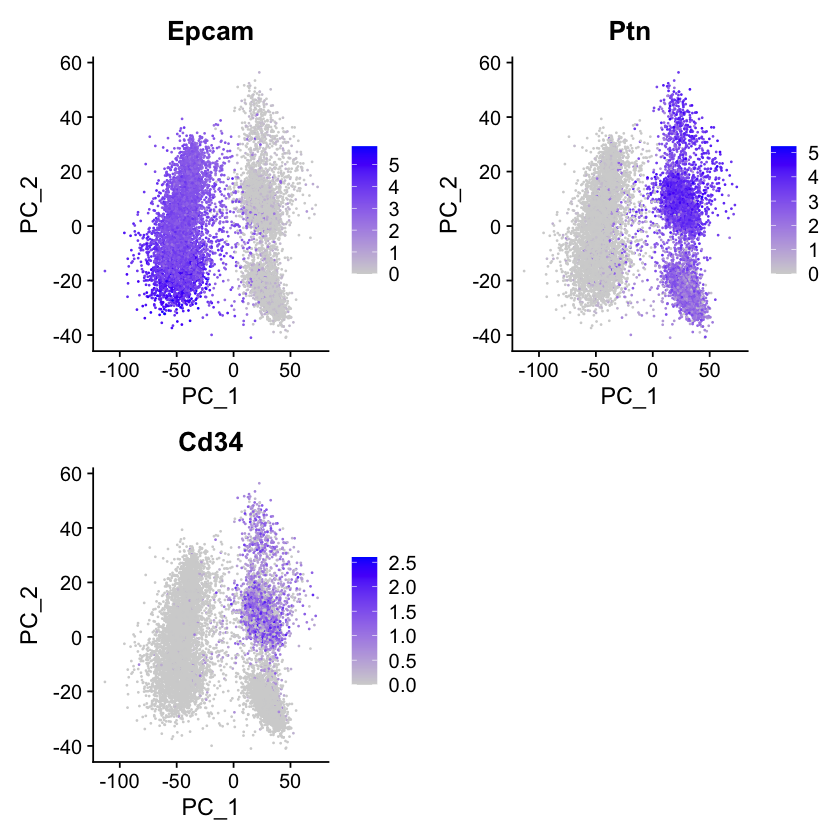

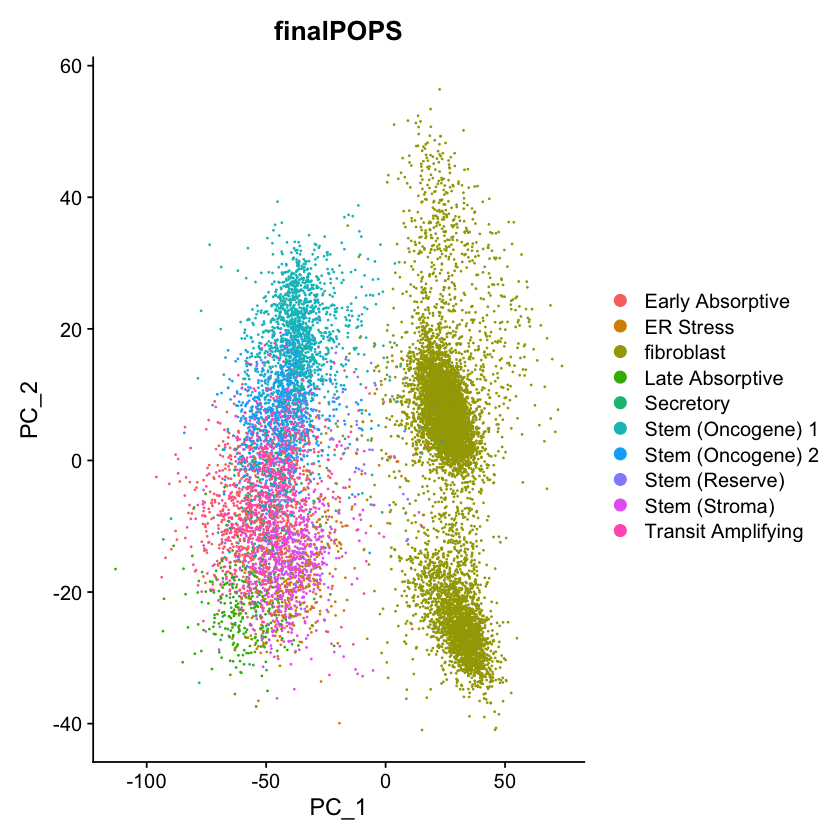

In [12]:
DimPlot(INTccWT, reduction = "pca", group.by = "orig.ident", shuffle = TRUE)
INTccWT@active.assay <- "RNA"
FeaturePlot(INTccWT, features = c("Epcam","Ptn","Cd34"), ncol = 2)
INTccWT@active.assay <- "integrated"
DimPlot(INTccWT, reduction = "pca", group.by = "finalPOPS", shuffle = TRUE)

In [9]:
INTccWT <- ScaleData(INTccWT, features=rownames(INTccWT@assays$SCT), assay="RNA")

Centering and scaling data matrix



# Interaction genes

Use onl;y secreted signalling and then get the unique set of ligands and 
receptors genes. 
Then we can subset int object with finalPOPS annotations.

In [12]:
interactionDF <- readRDS("../RData/dCellComm_Diff_interaction_FINAL.rds ")
head(interactionDF)
interactionDF  <- interactionDF %>% filter(annotation=="Secreted Signaling") %>%  
                    ungroup() %>% select(ligand, receptor, pathway_name)
ligandDF <- interactionDF %>% select(!receptor) %>% distinct()
ligandDF
receptorDF <- interactionDF %>% select(!ligand) %>% distinct()
receptorDF
#We will get rid of the FGF, PDGF and ACTIVIN pathways
gLigands <- ligandDF %>% filter(!pathway_name%in%c("FGF", "PDGF", "ACTIVIN"))
gLigands <- gLigands$ligand
gLigands
gReceptors <- c("TGFbR1", "TGFbR2", "ACVR1B", "TGFbR2", "ACVR1", 
                "FZD5","LRP6", "Fzd5", "Egfr","EGFR","ERBB2", "Erbb3", "ERBB2", 
                "ERBB3", "Igf1r", "ITGA6", "ITGB4", "Tnfrsf12a", "Cd44", 
                "ITGAV", "ITGB1", "ITGAV", "ITGB6", "Sdc1", "Sdc4", "Sdc1", 
                "Sdc4", "Ncl","NRP1", "PLXNA1", "Cd44", "Met", "Sort1", 
                "BMPR1A", "ACVR2A", "BMPR1A","BMPR2")
gReceptors <- as.character(unique(lapply(X=gReceptors, FUN = str_to_sentence)))
gReceptors

Genotype Cluster        ligand receptor      prob         interaction_name   
1 WT       Stem (Stroma)  Tgfb1  TGFbR1_R2     0.0010918465 TGFB1_TGFBR1_TGFBR2
2 WT       Stem (Stroma)  Tgfb2  TGFbR1_R2     0.0002637431 TGFB2_TGFBR1_TGFBR2
3 WT       Stem (Reserve) Tgfb1  ACVR1B_TGFbR2 0.0011562323 TGFB1_ACVR1B_TGFBR2
4 WT       Stem (Reserve) Tgfb2  ACVR1B_TGFbR2 0.0002793907 TGFB2_ACVR1B_TGFBR2
5 WT       Stem (Stroma)  Tgfb2  ACVR1_TGFbR   0.0004614416 TGFB2_ACVR1_TGFBR1 
6 WT       Stem (Reserve) Wnt4   FZD5_LRP6     0.0013757913 WNT4_FZD5_LRP6     
  interaction_name_2       pathway_name annotation        
1 Tgfb1 - (Tgfbr1+Tgfbr2)  TGFb         Secreted Signaling
2 Tgfb2  - (Tgfbr1+Tgfbr2) TGFb         Secreted Signaling
3 Tgfb1  - (Acvr1b+Tgfbr2) TGFb         Secreted Signaling
4 Tgfb2  - (Acvr1b+Tgfbr2) TGFb         Secreted Signaling
5 Tgfb2  - (Acvr1+Tgfbr1)  TGFb         Secreted Signaling
6 Wnt4  - (Fzd5+Lrp6)      WNT          Secreted Signaling
  evidence                       probWT       LFCprob Columns          
1 KEGG: mmu04350                 0.0010918465 0       WT_Stem (Stroma) 
2 KEGG: mmu04350                 0.0002637431 0       WT_Stem (Stroma) 
3 PMID: 27449815                 0.0011562323 0       WT_Stem (Reserve)
4 PMID: 27449815                 0.0002793907 0       WT_Stem (Reserve)
5 PMID: 29376829                 0.0004614416 0       WT_Stem (Stroma) 
6 KEGG: mmu04310; PMID: 23209147 0.0013757913 0       WT_Stem (Reserve)

ligand  pathway_name
1  Tgfb1   TGFb        
2  Tgfb2   TGFb        
3  Wnt4    WNT         
4  Wnt5a   ncWNT       
5  Ereg    EGF         
6  Nrg1    NRG         
7  Igf1    IGF         
8  Tnfsf12 TWEAK       
9  Spp1    SPP1        
10 Angptl4 ANGPTL      
11 Ptn     PTN         
12 Sema3a  SEMA3       
13 Lgals9  GALECTIN    
14 Fgf2    FGF         
15 Pdgfc   PDGF        
16 Hgf     HGF         
17 Grn     GRN         
18 Bmp4    BMP         
19 Inhba   ACTIVIN

receptor      pathway_name
1  TGFbR1_R2     TGFb        
2  ACVR1B_TGFbR2 TGFb        
3  ACVR1_TGFbR   TGFb        
4  FZD5_LRP6     WNT         
5  Fzd5          ncWNT       
6  Egfr          EGF         
7  EGFR_ERBB2    EGF         
8  Erbb3         NRG         
9  ERBB2_ERBB3   NRG         
10 Igf1r         IGF         
11 ITGA6_ITGB4   IGF         
12 Tnfrsf12a     TWEAK       
13 Cd44          SPP1        
14 ITGAV_ITGB1   SPP1        
15 ITGAV_ITGB6   SPP1        
16 Sdc1          ANGPTL      
17 Sdc4          ANGPTL      
18 Sdc1          PTN         
19 Sdc4          PTN         
20 Ncl           PTN         
21 NRP1_PLXNA1   SEMA3       
22 Cd44          GALECTIN    
23 Fgfr1         FGF         
24 Pdgfra        PDGF        
25 Met           HGF         
26 Sort1         GRN         
27 BMPR1A_ACVR2A BMP         
28 BMPR1A_BMPR2  BMP         
29 ACVR1B_ACVR2A ACTIVIN

[1] "Tgfb1"   "Tgfb2"   "Wnt4"    "Wnt5a"   "Ereg"    "Nrg1"    "Igf1"   
 [8] "Tnfsf12" "Spp1"    "Angptl4" "Ptn"     "Sema3a"  "Lgals9"  "Hgf"    
[15] "Grn"     "Bmp4"

[1] "Tgfbr1"    "Tgfbr2"    "Acvr1b"    "Acvr1"     "Fzd5"      "Lrp6"     
 [7] "Egfr"      "Erbb2"     "Erbb3"     "Igf1r"     "Itga6"     "Itgb4"    
[13] "Tnfrsf12a" "Cd44"      "Itgav"     "Itgb1"     "Itgb6"     "Sdc1"     
[19] "Sdc4"      "Ncl"       "Nrp1"      "Plxna1"    "Met"       "Sort1"    
[25] "Bmpr1a"    "Acvr2a"    "Bmpr2"

Metadata prep

In [11]:
head(INTccWT@meta.data)
unique(INTccWT@meta.data$orig.ident)
unique(INTccWT@meta.data$finalPOPS)

orig.ident  nCount_RNA nFeature_RNA mito_content
WT__AAACCCACAGCTTCCT-1 cocultWTFib 10761      3163         0.9478673   
WT__AAACCCAGTTCGAGCC-1 cocultWTFib 15485      3811         1.2334517   
WT__AAACGAAAGAAGGATG-1 cocultWTFib 16689      3775         1.2702978   
WT__AAACGAAAGGAAAGGT-1 cocultWTFib  5756      2126         1.4767199   
WT__AAACGAAAGTTAACGA-1 cocultWTFib 40330      4714         0.4512770   
WT__AAACGAACACCAGCTG-1 cocultWTFib 29829      5235         0.8917496   
                       rfp_content gfp_content nCount_SCT nFeature_SCT
WT__AAACCCACAGCTTCCT-1 0.009292817 0           17505      3210        
WT__AAACCCAGTTCGAGCC-1 0.000000000 0           17665      3811        
WT__AAACGAAAGAAGGATG-1 0.000000000 0           17764      3775        
WT__AAACGAAAGGAAAGGT-1 0.000000000 0           16412      2955        
WT__AAACGAAAGTTAACGA-1 0.000000000 0           19005      3762        
WT__AAACGAACACCAGCTG-1 0.003352442 0           19108      5041        
                       S.Score     G2M.Score     Phase          old.ident
WT__AAACCCACAGCTTCCT-1 0.091843066 -3.454633e-02 Cycling        fCd34    
WT__AAACCCAGTTCGAGCC-1 0.046962944 -9.039022e-05 Cycling        fCd34frz 
WT__AAACGAAAGAAGGATG-1 0.046281164 -4.622849e-02 Cycling        fCd34frz 
WT__AAACGAAAGGAAAGGT-1 0.041873413 -5.465700e-03 Cycling        eAbs     
WT__AAACGAAAGTTAACGA-1 0.009359052  7.385860e-03 Cycling        eStemE   
WT__AAACGAACACCAGCTG-1 0.316454554  4.528177e-01 Highly cycling fCd34cyc 
                       CCDiff       SCT_snn_res.0.6 seurat_clusters
WT__AAACCCACAGCTTCCT-1  0.126389393 4               4              
WT__AAACCCAGTTCGAGCC-1  0.047053334 2               2              
WT__AAACGAAAGAAGGATG-1  0.092509653 2               2              
WT__AAACGAAAGGAAAGGT-1  0.047339114 9               9              
WT__AAACGAAAGTTAACGA-1  0.001973191 5               5              
WT__AAACGAACACCAGCTG-1 -0.136363190 7               7              
                       curatedCLUST       old.clust   finalPOPS         
WT__AAACCCACAGCTTCCT-1 NA                 fibroblast  fibroblast        
WT__AAACCCAGTTCGAGCC-1 NA                 fibroblast  fibroblast        
WT__AAACGAAAGAAGGATG-1 NA                 fibroblast  fibroblast        
WT__AAACGAAAGGAAAGGT-1 Late Absorptive    eAbsorptive Late Absorptive   
WT__AAACGAAAGTTAACGA-1 Transit Amplifying eStem       Transit Amplifying
WT__AAACGAACACCAGCTG-1 NA                 fibroblast  fibroblast

[1] cocultWTFib  cocultAFib   cocultAKFib  cocultAKPFib
Levels: cocultWTFib cocultAFib cocultAKFib cocultAKPFib

[1] "fibroblast"         "Late Absorptive"    "Transit Amplifying"
 [4] "Stem (Stroma)"      "Stem (Oncogene) 1"  "Stem (Oncogene) 2" 
 [7] "Secretory"          "Early Absorptive"   "ER Stress"         
[10] "Stem (Reserve)"

Need to factorise orig.ident. No need to add genotype metadata as we can use orig.ident for that

In [90]:
INTccWT@meta.data$orig.ident <- factor(
                                    INTccWT@meta.data$orig.ident,
                                    levels = c('cocultWTFib','cocultAFib',
                                        'cocultAKFib','cocultAKPFib')
                                )

## Fibroblast -> Ligands

In [91]:
mat_FIBlig <- subset(INTccWT, subset = finalPOPS == "fibroblast"
                    )[["RNA"]]@scale.data[gLigands,] %>% 
                as.matrix()
mat_FIBlig

WT__AAACCCACAGCTTCCT-1 WT__AAACCCAGTTCGAGCC-1 WT__AAACGAAAGAAGGATG-1
Tgfb1    0.5781430             -0.8193637              1.78113778           
Tgfb2    2.7558715              1.0263217              0.93636227           
Wnt4    -0.7358184              1.5223606             -0.06651458           
Wnt5a   -0.4475614             -0.4475614              1.63845261           
Ereg    -0.4730925             -0.4730925             -0.47309248           
Nrg1    -0.3856621             -0.3856621              1.87286136           
Igf1     2.0410569             -0.3779457             -0.37794574           
Tnfsf12 -0.8153291             -0.8153291              1.05578152           
Spp1     0.8447401              0.1697958              0.50154198           
Angptl4 -0.6864108             -0.6864108              2.24048864           
Ptn      1.3973901              1.0560149              0.93441848           
Sema3a  -0.4372144              1.5942125             -0.43721441           
Lgals9   1.0103911              1.4811610             -0.78729865           
Hgf      0.1843406              0.4087734             -0.67268227           
Grn     -0.8614630             -0.8614630             -0.86146305           
Bmp4    -0.3491613             -0.3491613             -0.34916131           
        WT__AAACGAACACCAGCTG-1 WT__AAACGAACACCGTGCA-1 WT__AAACGAACATACTTTC-1
Tgfb1    0.271841687            1.9480621             -0.19586683           
Tgfb2    0.371267985            2.9130164             -0.53443128           
Wnt4     2.111555011            2.8493028              1.13909707           
Wnt5a   -0.447561352           -0.4475614             -0.44756135           
Ereg    -0.473092478           -0.4730925             -0.47309248           
Nrg1    -0.385662103           -0.3856621             -0.38566210           
Igf1     0.686302068           -0.3779457             -0.37794574           
Tnfsf12  1.522957784           -0.8153291              0.85719925           
Spp1     0.766609089           -0.8429431             -0.84294307           
Angptl4  0.005597084           -0.6864108              0.01534335           
Ptn      1.407139428            1.0663442              1.64483822           
Sema3a  -0.437214409           -0.4372144             -0.43721441           
Lgals9   1.116700919           -0.7872987              1.13890222           
Hgf     -0.003499110           -0.6726823              0.24560642           
Grn      0.474109776            0.4710698              2.78962108           
Bmp4     1.132056100           -0.3491613             -0.34916131           
        WT__AAACGCTCACAGCCAC-1 WT__AAACGCTCATGACTAC-1 WT__AAACGCTGTATCCCAA-1
Tgfb1    1.2060258             -0.8193637              1.3567794            
Tgfb2   -0.5344313             -0.5344313             -0.5344313            
Wnt4    -0.7358184             -0.7358184              1.2298894            
Wnt5a   -0.4475614             -0.4475614             -0.4475614            
Ereg     3.2189791             -0.4730925             -0.4730925            
Nrg1     4.1958109             -0.3856621             -0.3856621            
Igf1    -0.3779457             -0.3779457             -0.3779457            
Tnfsf12  1.0509584              2.4180907              1.0447553            
Spp1     2.1851969              1.5257435             -0.5448148            
Angptl4  0.7151002             -0.6864108              2.6140487            
Ptn     -0.2528312              0.9953716              1.0459987            
Sema3a   0.9288197             -0.4372144             -0.4372144            
Lgals9   0.8144953              1.0633912              1.3549049            
Hgf      1.6143713              1.3914090             -0.6726823            
Grn      0.0105679              0.8994336              1.8020113            
Bmp4    -0.3491613             -0.3491613              3.6628151            
        WT__AAACGCTGTCAAGGCA-1 ⋯ AKP__TTTGACTCACAGTGTT-1
Tgfb1   -0.13782725     

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



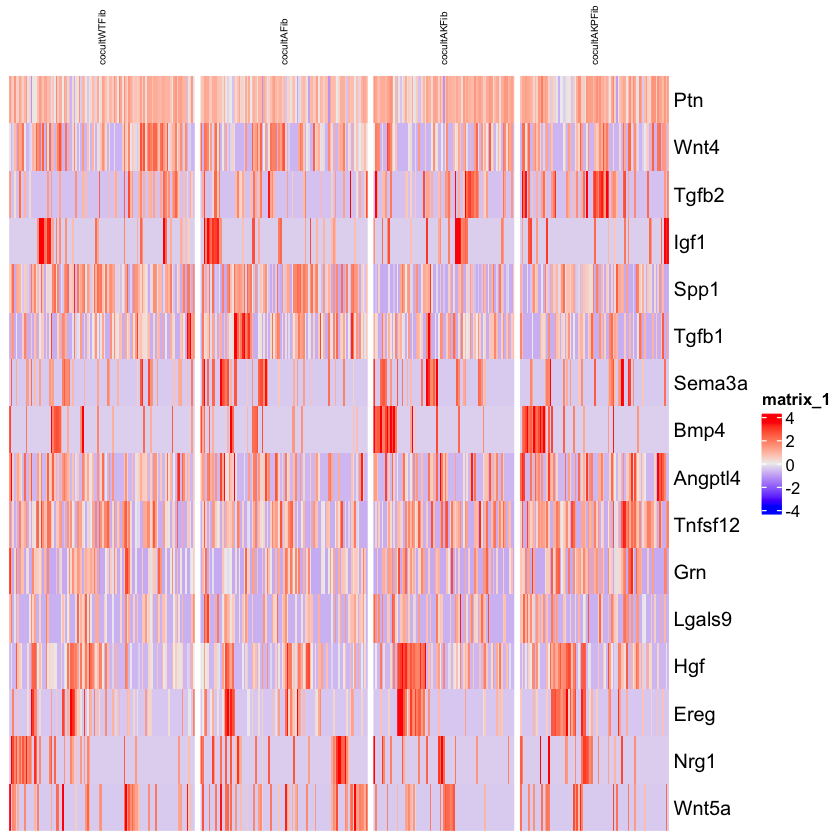

In [93]:
Heatmap(mat_FIBlig,
        column_split = subset(INTccWT, subset = finalPOPS == "fibroblast"
                    )@meta.data$orig.ident,
        cluster_columns = TRUE, show_column_dend = FALSE, cluster_column_slices = FALSE,
        cluster_rows = TRUE, cluster_row_slices = TRUE, show_row_dend = FALSE,
        column_title_rot = 90, column_title_gp = gpar(fontsize=6),
        column_gap = unit(1.2, "mm"), show_column_names = FALSE
        )

## Epithelia -> Receptors

In [86]:
# gLigands %in% rownames(subset(INTccWT, subset = finalPOPS == "fibroblast"
#                     )[["RNA"]]@scale.data)
# gReceptors %in% rownames(subset(INTccWT, subset = finalPOPS != "fibroblast"
#                     )[["RNA"]]@scale.data)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE

[1] "Tgfbr"

In [92]:
mat_EPIrec <- subset(INTccWT, subset = finalPOPS != "fibroblast"
                    )[["RNA"]]@scale.data[gReceptors,] %>% 
                as.matrix()
mat_EPIrec

WT__AAACGAAAGGAAAGGT-1 WT__AAACGAAAGTTAACGA-1 WT__AAAGAACAGCAGCGAT-1
Tgfbr1    -0.5989167              0.16548414            -0.5989167            
Tgfbr2    -1.0563494             -0.05258418            -1.0563494            
Acvr1b    -0.3304465              1.00899978             2.5631697            
Acvr1     -0.5002939              1.19360247            -0.5002939            
Fzd5      -0.2324995             -0.23249947            -0.2324995            
Lrp6       1.4777349             -0.90331716             0.2281690            
Egfr      -0.5821054              0.82907206             1.0946279            
Erbb2      5.6324212              0.96380882            -0.3527541            
Erbb3     -0.3007154             -0.30071544            -0.3007154            
Igf1r     -0.5515788             -0.55157883            -0.5515788            
Itga6      2.5116628              1.52024353            -0.6284466            
Itgb4      3.3282821              3.32603896            -0.4477997            
Tnfrsf12a  1.0296842              0.69531285             1.8612648            
Cd44      -0.9841727             -0.98417270             1.5930596            
Itgav      2.8439088              0.14094811            -0.6212951            
Itgb1      0.8424777              1.02400038             0.9212497            
Itgb6     -0.2421343             -0.24213428             4.7895873            
Sdc1       1.4549550              0.69903189             1.9737224            
Sdc4       0.2861114             -0.84057550             0.7201372            
Ncl       -1.8258166             -1.46883743            -0.1430205            
Nrp1      -0.6507751             -0.65077514            -0.6507751            
Plxna1    -0.4069271             -0.40692714             2.0779246            
Met       -0.3077244              1.31856650            -0.3077244            
Sort1     -0.2338247             -0.23382474            -0.2338247            
Bmpr1a    -0.5095351              0.50405796             3.1549631            
Acvr2a    -0.3368992             -0.33689921            -0.3368992            
Bmpr2      1.6250033             -0.81215370            -0.8121537            
          WT__AAAGAACTCTACTGAG-1 WT__AAAGTCCAGTAACGTA-1 WT__AAAGTCCCACCGGCTA-1
Tgfbr1    -0.59891665            -0.5989167             -0.5989167            
Tgfbr2    -1.05634938             0.6714018             -0.2381547            
Acvr1b    -0.33044655            -0.3304465             -0.3304465            
Acvr1     -0.50029391            -0.5002939             -0.5002939            
Fzd5       4.81028684            -0.2324995              2.7425184            
Lrp6      -0.15508269            -0.9033172             -0.1270855            
Egfr      -0.58210536             0.4260479              1.4327335            
Erbb2     -0.35275412             1.3573392             -0.3527541            
Erbb3      1.62805666            -0.3007154             -0.3007154            
Igf1r     -0.55157883            -0.5515788             -0.5515788            
Itga6      1.70986458             1.5332355              1.7812768            
Itgb4      1.63882751             0.6311081             -0.4477997            
Tnfrsf12a  1.20216625             1.1774050              1.1465367            
Cd44      -0.98417270             1.9877010             -0.1739159            
Itgav      0.46762904             0.3687882             -0.6212951            
Itgb1     -0.79464645             1.2531344              0.1142075            
Itgb6     -0.24213428            -0.2421343             -0.2421343            
Sdc1       0.84897059             1.7825917              0.1014557            
Sdc4       0.36861689            -0.2989405             -0.1506239            
Ncl        1.29998647            -0.4601865             -0.5804405            
Nrp1      -0.65077514            -0.6507751              0.2393975            
Plxna1    -0.40692714            -0.4069271             -0.4

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



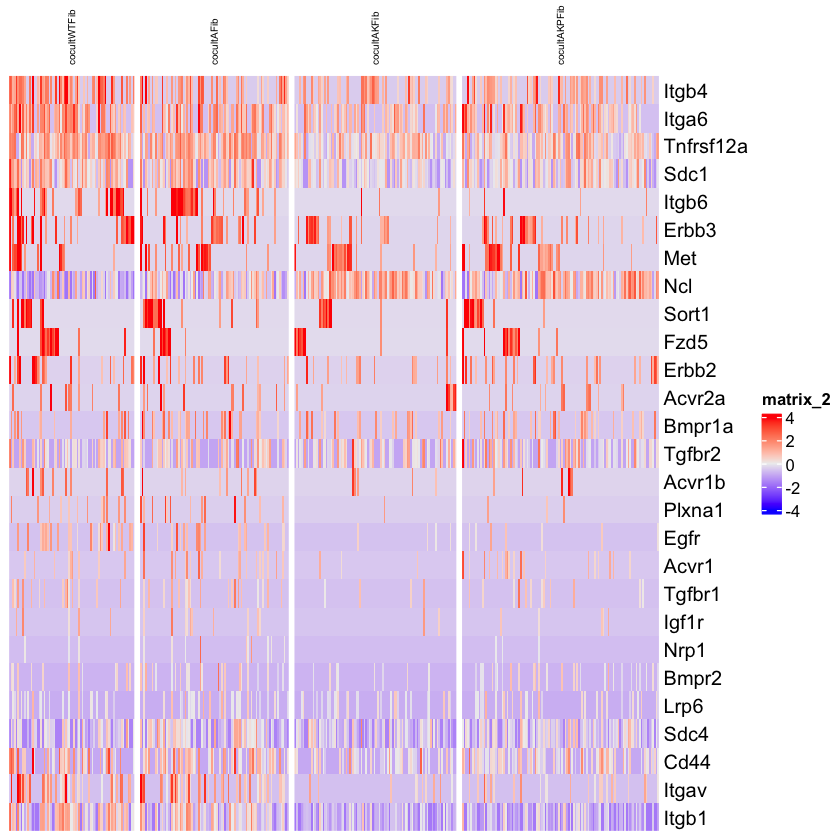

In [94]:
Heatmap(mat_EPIrec,
        column_split = subset(INTccWT, subset = finalPOPS != "fibroblast"
                    )@meta.data$orig.ident,
        cluster_columns = TRUE, show_column_dend = FALSE, cluster_column_slices = FALSE,
        cluster_rows = TRUE, cluster_row_slices = TRUE, show_row_dend = FALSE,
        column_title_rot = 90, column_title_gp = gpar(fontsize=6),
        column_gap = unit(1.2, "mm"), show_column_names = FALSE
        )

# Plots: Htmp/DotPlot

Need to sort genes using the same order as in Figure 5 (not excatly the same as single genes do not necessarily match 100% interactions from cellchat [multi ones and repetitions])

## FIBligands

In [13]:
gLigands


[1] "Tgfb1"   "Tgfb2"   "Wnt4"    "Wnt5a"   "Ereg"    "Nrg1"    "Igf1"   
 [8] "Tnfsf12" "Spp1"    "Angptl4" "Ptn"     "Sema3a"  "Lgals9"  "Hgf"    
[15] "Grn"     "Bmp4"

In [14]:
gLigands <- c(
            "Wnt5a","Wnt4","Sema3a","Tgfb2","Tgfb1","Igf1","Nrg1","Ereg",
            "Spp1","Angptl4","Ptn","Lgals9","Tnfsf12","Hgf","Grn","Bmp4"         
            )
length(gLigands)
gLigands

[1] 16

[1] "Wnt5a"   "Wnt4"    "Sema3a"  "Tgfb2"   "Tgfb1"   "Igf1"    "Nrg1"   
 [8] "Ereg"    "Spp1"    "Angptl4" "Ptn"     "Lgals9"  "Tnfsf12" "Hgf"    
[15] "Grn"     "Bmp4"

In [97]:
mat_FIBlig <- subset(INTccWT, subset = finalPOPS == "fibroblast"
                    )[["RNA"]]@scale.data[gLigands,] %>% 
                as.matrix()
mat_FIBlig

WT__AAACCCACAGCTTCCT-1 WT__AAACCCAGTTCGAGCC-1 WT__AAACGAAAGAAGGATG-1
Wnt5a   -0.4475614             -0.4475614              1.63845261           
Wnt4    -0.7358184              1.5223606             -0.06651458           
Sema3a  -0.4372144              1.5942125             -0.43721441           
Tgfb2    2.7558715              1.0263217              0.93636227           
Tgfb1    0.5781430             -0.8193637              1.78113778           
Igf1     2.0410569             -0.3779457             -0.37794574           
Nrg1    -0.3856621             -0.3856621              1.87286136           
Ereg    -0.4730925             -0.4730925             -0.47309248           
Spp1     0.8447401              0.1697958              0.50154198           
Angptl4 -0.6864108             -0.6864108              2.24048864           
Ptn      1.3973901              1.0560149              0.93441848           
Lgals9   1.0103911              1.4811610             -0.78729865           
Tnfsf12 -0.8153291             -0.8153291              1.05578152           
Hgf      0.1843406              0.4087734             -0.67268227           
Grn     -0.8614630             -0.8614630             -0.86146305           
Bmp4    -0.3491613             -0.3491613             -0.34916131           
        WT__AAACGAACACCAGCTG-1 WT__AAACGAACACCGTGCA-1 WT__AAACGAACATACTTTC-1
Wnt5a   -0.447561352           -0.4475614             -0.44756135           
Wnt4     2.111555011            2.8493028              1.13909707           
Sema3a  -0.437214409           -0.4372144             -0.43721441           
Tgfb2    0.371267985            2.9130164             -0.53443128           
Tgfb1    0.271841687            1.9480621             -0.19586683           
Igf1     0.686302068           -0.3779457             -0.37794574           
Nrg1    -0.385662103           -0.3856621             -0.38566210           
Ereg    -0.473092478           -0.4730925             -0.47309248           
Spp1     0.766609089           -0.8429431             -0.84294307           
Angptl4  0.005597084           -0.6864108              0.01534335           
Ptn      1.407139428            1.0663442              1.64483822           
Lgals9   1.116700919           -0.7872987              1.13890222           
Tnfsf12  1.522957784           -0.8153291              0.85719925           
Hgf     -0.003499110           -0.6726823              0.24560642           
Grn      0.474109776            0.4710698              2.78962108           
Bmp4     1.132056100           -0.3491613             -0.34916131           
        WT__AAACGCTCACAGCCAC-1 WT__AAACGCTCATGACTAC-1 WT__AAACGCTGTATCCCAA-1
Wnt5a   -0.4475614             -0.4475614             -0.4475614            
Wnt4    -0.7358184             -0.7358184              1.2298894            
Sema3a   0.9288197             -0.4372144             -0.4372144            
Tgfb2   -0.5344313             -0.5344313             -0.5344313            
Tgfb1    1.2060258             -0.8193637              1.3567794            
Igf1    -0.3779457             -0.3779457             -0.3779457            
Nrg1     4.1958109             -0.3856621             -0.3856621            
Ereg     3.2189791             -0.4730925             -0.4730925            
Spp1     2.1851969              1.5257435             -0.5448148            
Angptl4  0.7151002             -0.6864108              2.6140487            
Ptn     -0.2528312              0.9953716              1.0459987            
Lgals9   0.8144953              1.0633912              1.3549049            
Tnfsf12  1.0509584              2.4180907              1.0447553            
Hgf      1.6143713              1.3914090             -0.6726823            
Grn      0.0105679              0.8994336              1.8020113            
Bmp4    -0.3491613             -0.3491613              3.6628151            
        WT__AAACGCTGTCAAGGCA-1 ⋯ AKP__TTTGACTCACAGTGTT-1
Wnt5a   -0.44756135     

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



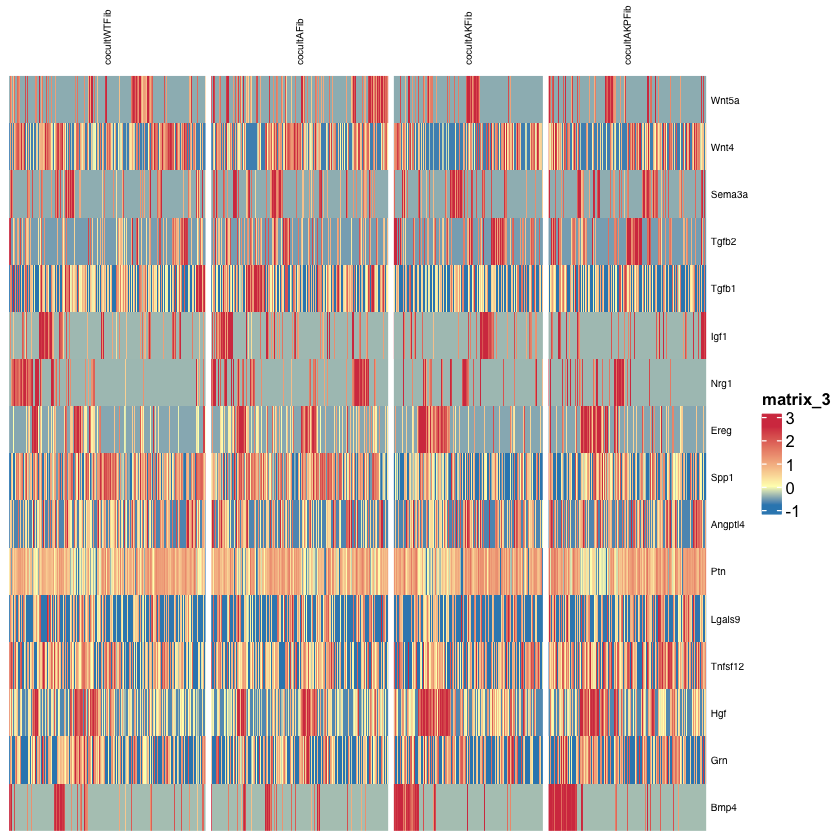

In [98]:
pHtmp_FIBligands <- Heatmap(
        mat_FIBlig,
        column_split = subset(INTccWT, subset = finalPOPS == "fibroblast"
                    )@meta.data$orig.ident,
        cluster_columns = TRUE, show_column_dend = FALSE, cluster_column_slices = FALSE,
        cluster_row_slices = FALSE, cluster_rows = FALSE,
        row_names_gp = gpar(fontsize=6, fontfamily="Helvetica"),
        column_title_rot = 90, column_title_gp = gpar(fontsize=6),
        column_gap = unit(1.2, "mm"), show_column_names = FALSE,
        use_raster = TRUE, raster_quality = 4,
        col=circlize::colorRamp2(
                c(round(quantile(mat_FIBlig, c(0.04,0.96))[1], digits = 1),
                0, 
                round(quantile(mat_FIBlig, c(0.04,0.96))[2], digits = 1)), 
                c("#3288BD", "#FEFEBD", "#D53E4F"))
        )

pHtmp_FIBligands

Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



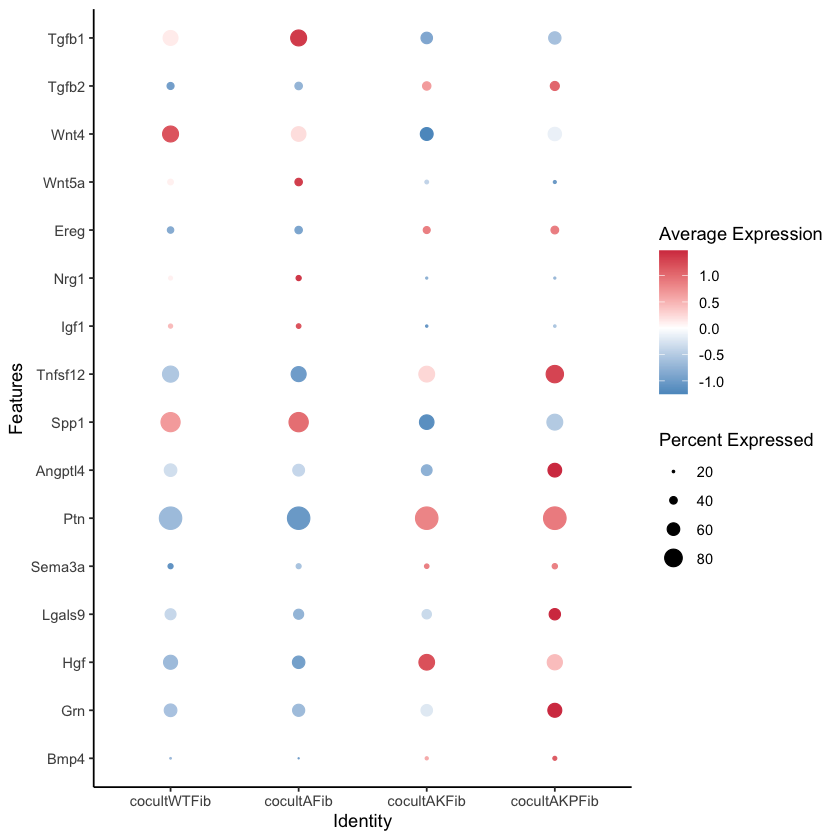

In [123]:
pDotP_FIBligands <- DotPlot(
                        subset(INTccWT, subset = finalPOPS == "fibroblast"
                                ),
                        assay = "RNA",
                        features = rev(gLigands),
                        group.by = "orig.ident"
                    ) + 
                    scale_colour_gradient2(low = "#3288BD", mid = "white", 
                    high = "#D53E4F"
                    ) + 
                    coord_flip() +
                    theme_classic()
pDotP_FIBligands

In [126]:
ggsave(pDotP_FIBligands, filename = "pDotP_FIBligands.pdf", 
        height=3.6, width=6, dpi = 600)

## EPIreceptors

In [15]:
gReceptors
length(gReceptors)


[1] "Tgfbr1"    "Tgfbr2"    "Acvr1b"    "Acvr1"     "Fzd5"      "Lrp6"     
 [7] "Egfr"      "Erbb2"     "Erbb3"     "Igf1r"     "Itga6"     "Itgb4"    
[13] "Tnfrsf12a" "Cd44"      "Itgav"     "Itgb1"     "Itgb6"     "Sdc1"     
[19] "Sdc4"      "Ncl"       "Nrp1"      "Plxna1"    "Met"       "Sort1"    
[25] "Bmpr1a"    "Acvr2a"    "Bmpr2"

[1] 27

In [16]:
gReceptors <- c(
                "Fzd5","Lrp6","Nrp1","Plxna1","Acvr1","Tgfbr1","Tgfbr2",
                "Acvr1b","Itga6","Itgb4","Igf1r","Erbb2","Erbb3","Egfr","Cd44",
                "Itgav","Itgb1","Itgb6","Sdc1","Sdc4","Ncl","Tnfrsf12a","Met",
                "Sort1","Bmpr1a","Bmpr2","Acvr2a"
                )
length(gReceptors)
gReceptors

[1] 27

[1] "Fzd5"      "Lrp6"      "Nrp1"      "Plxna1"    "Acvr1"     "Tgfbr1"   
 [7] "Tgfbr2"    "Acvr1b"    "Itga6"     "Itgb4"     "Igf1r"     "Erbb2"    
[13] "Erbb3"     "Egfr"      "Cd44"      "Itgav"     "Itgb1"     "Itgb6"    
[19] "Sdc1"      "Sdc4"      "Ncl"       "Tnfrsf12a" "Met"       "Sort1"    
[25] "Bmpr1a"    "Bmpr2"     "Acvr2a"

In [104]:
mat_EPIrec <- subset(INTccWT, subset = finalPOPS != "fibroblast"
                    )[["RNA"]]@scale.data[gReceptors,] %>% 
                as.matrix()
mat_EPIrec

WT__AAACGAAAGGAAAGGT-1 WT__AAACGAAAGTTAACGA-1 WT__AAAGAACAGCAGCGAT-1
Fzd5      -0.2324995             -0.23249947            -0.2324995            
Lrp6       1.4777349             -0.90331716             0.2281690            
Nrp1      -0.6507751             -0.65077514            -0.6507751            
Plxna1    -0.4069271             -0.40692714             2.0779246            
Acvr1     -0.5002939              1.19360247            -0.5002939            
Tgfbr1    -0.5989167              0.16548414            -0.5989167            
Tgfbr2    -1.0563494             -0.05258418            -1.0563494            
Acvr1b    -0.3304465              1.00899978             2.5631697            
Itga6      2.5116628              1.52024353            -0.6284466            
Itgb4      3.3282821              3.32603896            -0.4477997            
Igf1r     -0.5515788             -0.55157883            -0.5515788            
Erbb2      5.6324212              0.96380882            -0.3527541            
Erbb3     -0.3007154             -0.30071544            -0.3007154            
Egfr      -0.5821054              0.82907206             1.0946279            
Cd44      -0.9841727             -0.98417270             1.5930596            
Itgav      2.8439088              0.14094811            -0.6212951            
Itgb1      0.8424777              1.02400038             0.9212497            
Itgb6     -0.2421343             -0.24213428             4.7895873            
Sdc1       1.4549550              0.69903189             1.9737224            
Sdc4       0.2861114             -0.84057550             0.7201372            
Ncl       -1.8258166             -1.46883743            -0.1430205            
Tnfrsf12a  1.0296842              0.69531285             1.8612648            
Met       -0.3077244              1.31856650            -0.3077244            
Sort1     -0.2338247             -0.23382474            -0.2338247            
Bmpr1a    -0.5095351              0.50405796             3.1549631            
Bmpr2      1.6250033             -0.81215370            -0.8121537            
Acvr2a    -0.3368992             -0.33689921            -0.3368992            
          WT__AAAGAACTCTACTGAG-1 WT__AAAGTCCAGTAACGTA-1 WT__AAAGTCCCACCGGCTA-1
Fzd5       4.81028684            -0.2324995              2.7425184            
Lrp6      -0.15508269            -0.9033172             -0.1270855            
Nrp1      -0.65077514            -0.6507751              0.2393975            
Plxna1    -0.40692714            -0.4069271             -0.4069271            
Acvr1     -0.50029391            -0.5002939             -0.5002939            
Tgfbr1    -0.59891665            -0.5989167             -0.5989167            
Tgfbr2    -1.05634938             0.6714018             -0.2381547            
Acvr1b    -0.33044655            -0.3304465             -0.3304465            
Itga6      1.70986458             1.5332355              1.7812768            
Itgb4      1.63882751             0.6311081             -0.4477997            
Igf1r     -0.55157883            -0.5515788             -0.5515788            
Erbb2     -0.35275412             1.3573392             -0.3527541            
Erbb3      1.62805666            -0.3007154             -0.3007154            
Egfr      -0.58210536             0.4260479              1.4327335            
Cd44      -0.98417270             1.9877010             -0.1739159            
Itgav      0.46762904             0.3687882             -0.6212951            
Itgb1     -0.79464645             1.2531344              0.1142075            
Itgb6     -0.24213428            -0.2421343             -0.2421343            
Sdc1       0.84897059             1.7825917              0.1014557            
Sdc4       0.36861689            -0.2989405             -0.1506239            
Ncl        1.29998647            -0.4601865             -0.5804405            
Tnfrsf12a  1.20216625             1.1774050              1.1

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



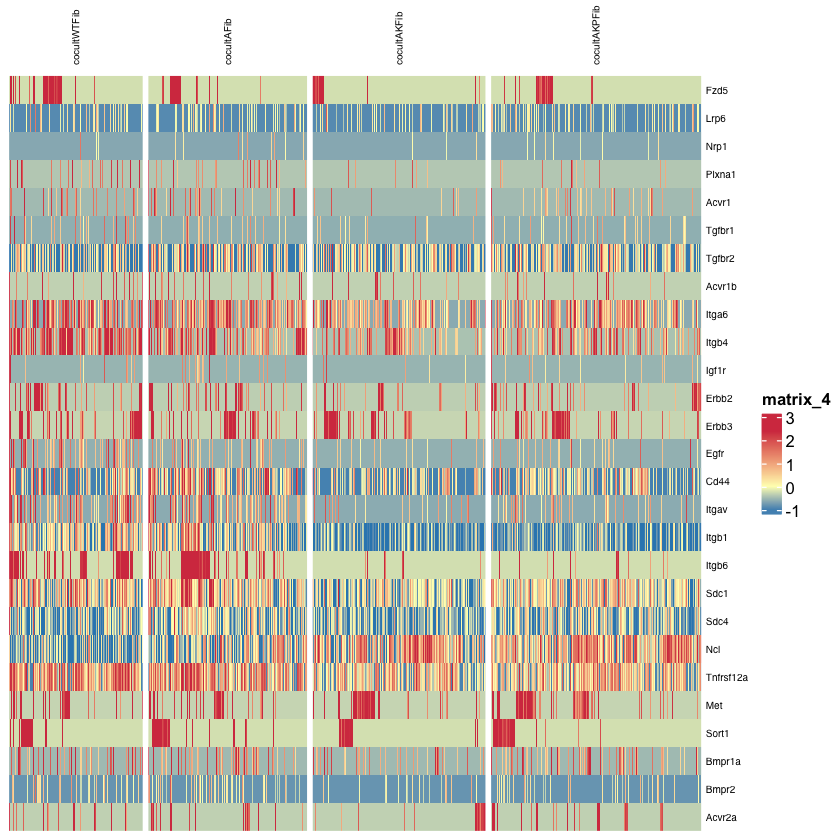

In [105]:
pHtmp_EPIreceptors <- Heatmap(
        mat_EPIrec,
        column_split = subset(INTccWT, subset = finalPOPS != "fibroblast"
                    )@meta.data$orig.ident,
        cluster_columns = TRUE, show_column_dend = FALSE, cluster_column_slices = FALSE,
        cluster_row_slices = FALSE, cluster_rows = FALSE,
        row_names_gp = gpar(fontsize=6, fontfamily="Helvetica"),
        column_title_rot = 90, column_title_gp = gpar(fontsize=6),
        column_gap = unit(1.2, "mm"), show_column_names = FALSE,
        use_raster = TRUE, raster_quality = 4,
        col=circlize::colorRamp2(
                c(round(quantile(mat_EPIrec, c(0.04,0.96))[1], digits = 1),
                0, 
                round(quantile(mat_EPIrec, c(0.04,0.96))[2], digits = 1)), 
                c("#3288BD", "#FEFEBD", "#D53E4F"))
        )

pHtmp_EPIreceptors

In [107]:
RColorBrewer::brewer.pal.info
colors=c("#3288BD","white","#D53E4F")

maxcolors category colorblind
BrBG     11        div       TRUE     
PiYG     11        div       TRUE     
PRGn     11        div       TRUE     
PuOr     11        div       TRUE     
RdBu     11        div       TRUE     
RdGy     11        div      FALSE     
RdYlBu   11        div       TRUE     
RdYlGn   11        div      FALSE     
Spectral 11        div      FALSE     
Accent    8        qual     FALSE     
Dark2     8        qual      TRUE     
Paired   12        qual      TRUE     
Pastel1   9        qual     FALSE     
Pastel2   8        qual     FALSE     
Set1      9        qual     FALSE     
Set2      8        qual      TRUE     
Set3     12        qual     FALSE     
Blues     9        seq       TRUE     
BuGn      9        seq       TRUE     
BuPu      9        seq       TRUE     
GnBu      9        seq       TRUE     
Greens    9        seq       TRUE     
Greys     9        seq       TRUE     
Oranges   9        seq       TRUE     
OrRd      9        seq       TRUE     
PuBu      9        seq       TRUE     
PuBuGn    9        seq       TRUE     
PuRd      9        seq       TRUE     
Purples   9        seq       TRUE     
RdPu      9        seq       TRUE     
Reds      9        seq       TRUE     
YlGn      9        seq       TRUE     
YlGnBu    9        seq       TRUE     
YlOrBr    9        seq       TRUE     
YlOrRd    9        seq       TRUE

Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



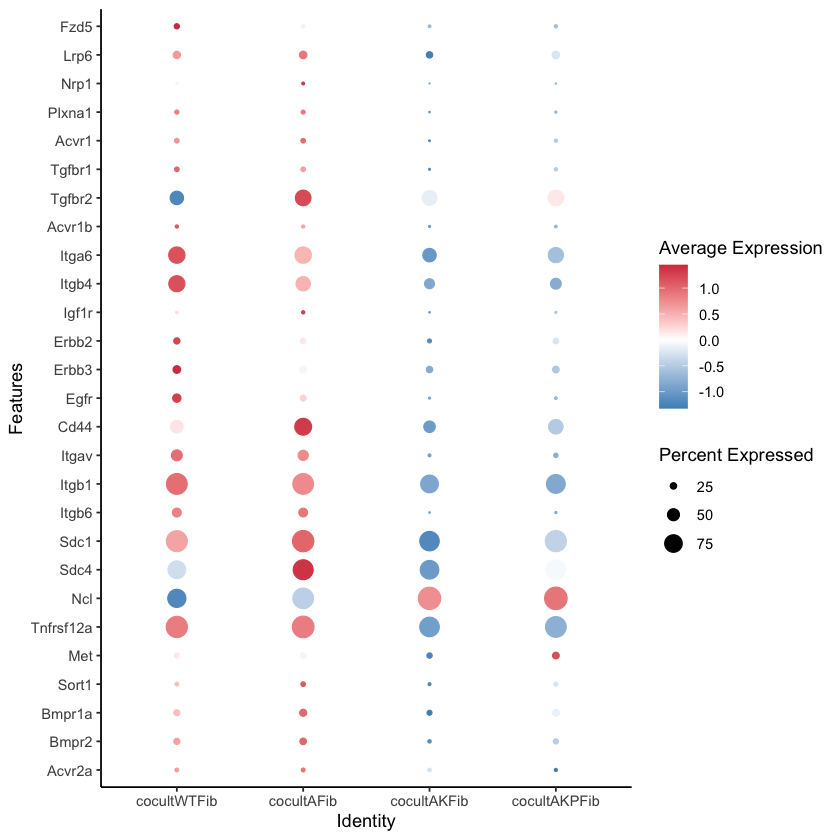

In [121]:
pDotP_EPIreceptors <- DotPlot(
                            subset(INTccWT, subset = finalPOPS != "fibroblast"
                                    ),
                            assay = "RNA",
                            features = rev(gReceptors),
                            group.by = "orig.ident"
                        ) + 
                        scale_colour_gradient2(low = "#3288BD", 
                            mid = "white", high = "#D53E4F"
                        ) + 
                        coord_flip() +
                        theme_classic()

pDotP_EPIreceptors


In [122]:
ggsave(pDotP_EPIreceptors, filename = "pDotP_EPIreceptors.pdf", 
        height=6, width=6, dpi = 600)

# UCell score distribution
The aim of this section is to compute UCell scores for ligands in fibroblasts and receptors in epithelia. The we can plot the resulting scores as violin plots, grouped by condition and split by epi/Fibro.

This will allow us to do some stats on the changes. We will need to compute ucell scores in the 2 objects and then merge the ucell metadata from both INTccWT subsets into a single dataframe.

Approach: Compute Ucell add module score on subset of data. -> add to seurat object.
If name is the same we should end up with2 score colum represeint ligands in fibro cells and receptors in epi cells.
Then normalise/scale scores so they can be compared and merge into a single column in a dataframe that also has orig.ident and celltype info (mutate based on finalPOPS)


Compute

In [17]:
INTccWT_fib <- UCell::AddModuleScore_UCell(
            obj = subset(INTccWT, subset = finalPOPS == "fibroblast"
                    ),
            features = list(Ligands = gLigands),
            assay = "RNA",
            storeRanks = FALSE,
            ncores = 12
)
INTccWT_epi <- UCell::AddModuleScore_UCell(
            obj = subset(INTccWT, subset = finalPOPS != "fibroblast"
                    ),
            features = list(Receptors = gReceptors),
            assay = "RNA",
            storeRanks = FALSE,
            ncores = 12
)
head(INTccWT_fib@meta.data)
head(INTccWT_epi@meta.data)

orig.ident  nCount_RNA nFeature_RNA mito_content
WT__AAACCCACAGCTTCCT-1 cocultWTFib 10761      3163         0.9478673   
WT__AAACCCAGTTCGAGCC-1 cocultWTFib 15485      3811         1.2334517   
WT__AAACGAAAGAAGGATG-1 cocultWTFib 16689      3775         1.2702978   
WT__AAACGAACACCAGCTG-1 cocultWTFib 29829      5235         0.8917496   
WT__AAACGAACACCGTGCA-1 cocultWTFib 14958      3741         1.0028079   
WT__AAACGAACATACTTTC-1 cocultWTFib 29352      5383         1.2673753   
                       rfp_content gfp_content nCount_SCT nFeature_SCT
WT__AAACCCACAGCTTCCT-1 0.009292817 0           17505      3210        
WT__AAACCCAGTTCGAGCC-1 0.000000000 0           17665      3811        
WT__AAACGAAAGAAGGATG-1 0.000000000 0           17764      3775        
WT__AAACGAACACCAGCTG-1 0.003352442 0           19108      5041        
WT__AAACGAACACCGTGCA-1 0.000000000 0           17487      3741        
WT__AAACGAACATACTTTC-1 0.003406923 0           19251      5189        
                       S.Score    G2M.Score     Phase          old.ident
WT__AAACCCACAGCTTCCT-1 0.09184307 -3.454633e-02 Cycling        fCd34    
WT__AAACCCAGTTCGAGCC-1 0.04696294 -9.039022e-05 Cycling        fCd34frz 
WT__AAACGAAAGAAGGATG-1 0.04628116 -4.622849e-02 Cycling        fCd34frz 
WT__AAACGAACACCAGCTG-1 0.31645455  4.528177e-01 Highly cycling fCd34cyc 
WT__AAACGAACACCGTGCA-1 0.03724666  4.313456e-04 Cycling        fCd34frz 
WT__AAACGAACATACTTTC-1 0.07962142  1.007156e-02 Cycling        fCd34frz 
                       CCDiff      SCT_snn_res.0.6 seurat_clusters curatedCLUST
WT__AAACCCACAGCTTCCT-1  0.12638939 4               4               NA          
WT__AAACCCAGTTCGAGCC-1  0.04705333 2               2               NA          
WT__AAACGAAAGAAGGATG-1  0.09250965 2               2               NA          
WT__AAACGAACACCAGCTG-1 -0.13636319 7               7               NA          
WT__AAACGAACACCGTGCA-1  0.03681532 2               2               NA          
WT__AAACGAACATACTTTC-1  0.06954987 2               2               NA          
                       old.clust  finalPOPS  Ligands_UCell
WT__AAACCCACAGCTTCCT-1 fibroblast fibroblast 0.1435625    
WT__AAACCCAGTTCGAGCC-1 fibroblast fibroblast 0.1664167    
WT__AAACGAAAGAAGGATG-1 fibroblast fibroblast 0.1886667    
WT__AAACGAACACCAGCTG-1 fibroblast fibroblast 0.1956458    
WT__AAACGAACACCGTGCA-1 fibroblast fibroblast 0.1894583    
WT__AAACGAACATACTTTC-1 fibroblast fibroblast 0.1467500

orig.ident  nCount_RNA nFeature_RNA mito_content
WT__AAACGAAAGGAAAGGT-1 cocultWTFib  5756      2126         1.4767199   
WT__AAACGAAAGTTAACGA-1 cocultWTFib 40330      4714         0.4512770   
WT__AAAGAACAGCAGCGAT-1 cocultWTFib 16295      3477         0.5952746   
WT__AAAGAACTCTACTGAG-1 cocultWTFib 26865      4320         0.5509027   
WT__AAAGTCCAGTAACGTA-1 cocultWTFib 29996      4809         0.8167756   
WT__AAAGTCCCACCGGCTA-1 cocultWTFib 25735      4018         0.3963474   
                       rfp_content gfp_content nCount_SCT nFeature_SCT
WT__AAACGAAAGGAAAGGT-1 0           0           16412      2955        
WT__AAACGAAAGTTAACGA-1 0           0           19005      3762        
WT__AAAGAACAGCAGCGAT-1 0           0           17640      3476        
WT__AAAGAACTCTACTGAG-1 0           0           18811      4237        
WT__AAAGTCCAGTAACGTA-1 0           0           18959      4594        
WT__AAAGTCCCACCGGCTA-1 0           0           18827      3972        
                       S.Score     G2M.Score    Phase          old.ident 
WT__AAACGAAAGGAAAGGT-1 0.041873413 -0.005465700 Cycling        eAbs      
WT__AAACGAAAGTTAACGA-1 0.009359052  0.007385860 Cycling        eStemE    
WT__AAAGAACAGCAGCGAT-1 0.055750267  0.006852469 Cycling        eStemE    
WT__AAAGAACTCTACTGAG-1 0.179288293  0.214402626 Highly cycling eStem/AbsP
WT__AAAGTCCAGTAACGTA-1 0.066697202 -0.016061398 Cycling        eStemE    
WT__AAAGTCCCACCGGCTA-1 0.067991975  0.016930931 Cycling        eStemE    
                       CCDiff       SCT_snn_res.0.6 seurat_clusters
WT__AAACGAAAGGAAAGGT-1  0.047339114 9               9              
WT__AAACGAAAGTTAACGA-1  0.001973191 5               5              
WT__AAAGAACAGCAGCGAT-1  0.048897798 5               5              
WT__AAAGAACTCTACTGAG-1 -0.035114333 6               6              
WT__AAAGTCCAGTAACGTA-1  0.082758601 5               5              
WT__AAAGTCCCACCGGCTA-1  0.051061044 5               5              
                       curatedCLUST       old.clust         finalPOPS         
WT__AAACGAAAGGAAAGGT-1 Late Absorptive    eAbsorptive       Late Absorptive   
WT__AAACGAAAGTTAACGA-1 Transit Amplifying eStem             Transit Amplifying
WT__AAAGAACAGCAGCGAT-1 Stem (Stroma)      eStem             Stem (Stroma)     
WT__AAAGAACTCTACTGAG-1 Stem (Oncogene) 1  eBasal_Absorptive Stem (Oncogene) 1 
WT__AAAGTCCAGTAACGTA-1 Transit Amplifying eStem             Transit Amplifying
WT__AAAGTCCCACCGGCTA-1 Stem (Stroma)      eStem             Stem (Stroma)     
                       Receptors_UCell
WT__AAACGAAAGGAAAGGT-1 0.08372840     
WT__AAACGAAAGTTAACGA-1 0.10308642     
WT__AAAGAACAGCAGCGAT-1 0.15837037     
WT__AAAGAACTCTACTGAG-1 0.10000000     
WT__AAAGTCCAGTAACGTA-1 0.11958025     
WT__AAAGTCCCACCGGCTA-1 0.07523457

Dataframe

In [18]:
INTccWT <- AddMetaData(INTccWT, metadata = select(INTccWT_fib@meta.data, Ligands_UCell))
INTccWT <- AddMetaData(INTccWT, metadata = select(INTccWT_epi@meta.data, Receptors_UCell))
head(INTccWT@meta.data)

scale(select(.data=INTccWT@meta.data, Ligands_UCell, Receptors_UCell))

orig.ident  nCount_RNA nFeature_RNA mito_content
WT__AAACCCACAGCTTCCT-1 cocultWTFib 10761      3163         0.9478673   
WT__AAACCCAGTTCGAGCC-1 cocultWTFib 15485      3811         1.2334517   
WT__AAACGAAAGAAGGATG-1 cocultWTFib 16689      3775         1.2702978   
WT__AAACGAAAGGAAAGGT-1 cocultWTFib  5756      2126         1.4767199   
WT__AAACGAAAGTTAACGA-1 cocultWTFib 40330      4714         0.4512770   
WT__AAACGAACACCAGCTG-1 cocultWTFib 29829      5235         0.8917496   
                       rfp_content gfp_content nCount_SCT nFeature_SCT
WT__AAACCCACAGCTTCCT-1 0.009292817 0           17505      3210        
WT__AAACCCAGTTCGAGCC-1 0.000000000 0           17665      3811        
WT__AAACGAAAGAAGGATG-1 0.000000000 0           17764      3775        
WT__AAACGAAAGGAAAGGT-1 0.000000000 0           16412      2955        
WT__AAACGAAAGTTAACGA-1 0.000000000 0           19005      3762        
WT__AAACGAACACCAGCTG-1 0.003352442 0           19108      5041        
                       S.Score     G2M.Score     Phase          old.ident
WT__AAACCCACAGCTTCCT-1 0.091843066 -3.454633e-02 Cycling        fCd34    
WT__AAACCCAGTTCGAGCC-1 0.046962944 -9.039022e-05 Cycling        fCd34frz 
WT__AAACGAAAGAAGGATG-1 0.046281164 -4.622849e-02 Cycling        fCd34frz 
WT__AAACGAAAGGAAAGGT-1 0.041873413 -5.465700e-03 Cycling        eAbs     
WT__AAACGAAAGTTAACGA-1 0.009359052  7.385860e-03 Cycling        eStemE   
WT__AAACGAACACCAGCTG-1 0.316454554  4.528177e-01 Highly cycling fCd34cyc 
                       CCDiff       SCT_snn_res.0.6 seurat_clusters
WT__AAACCCACAGCTTCCT-1  0.126389393 4               4              
WT__AAACCCAGTTCGAGCC-1  0.047053334 2               2              
WT__AAACGAAAGAAGGATG-1  0.092509653 2               2              
WT__AAACGAAAGGAAAGGT-1  0.047339114 9               9              
WT__AAACGAAAGTTAACGA-1  0.001973191 5               5              
WT__AAACGAACACCAGCTG-1 -0.136363190 7               7              
                       curatedCLUST       old.clust   finalPOPS         
WT__AAACCCACAGCTTCCT-1 NA                 fibroblast  fibroblast        
WT__AAACCCAGTTCGAGCC-1 NA                 fibroblast  fibroblast        
WT__AAACGAAAGAAGGATG-1 NA                 fibroblast  fibroblast        
WT__AAACGAAAGGAAAGGT-1 Late Absorptive    eAbsorptive Late Absorptive   
WT__AAACGAAAGTTAACGA-1 Transit Amplifying eStem       Transit Amplifying
WT__AAACGAACACCAGCTG-1 NA                 fibroblast  fibroblast        
                       Ligands_UCell Receptors_UCell
WT__AAACCCACAGCTTCCT-1 0.1435625            NA      
WT__AAACCCAGTTCGAGCC-1 0.1664167            NA      
WT__AAACGAAAGAAGGATG-1 0.1886667            NA      
WT__AAACGAAAGGAAAGGT-1        NA     0.0837284      
WT__AAACGAAAGTTAACGA-1        NA     0.1030864      
WT__AAACGAACACCAGCTG-1 0.1956458            NA

Ligands_UCell Receptors_UCell
WT__AAACCCACAGCTTCCT-1  -0.43786521          NA      
WT__AAACCCAGTTCGAGCC-1   0.03486260          NA      
WT__AAACGAAAGAAGGATG-1   0.49509350          NA      
WT__AAACGAAAGGAAAGGT-1           NA   0.3377529      
WT__AAACGAAAGTTAACGA-1           NA   0.8772464      
WT__AAACGAACACCAGCTG-1   0.63945431          NA      
WT__AAACGAACACCGTGCA-1   0.51146875          NA      
WT__AAACGAACATACTTTC-1  -0.37193326          NA      
WT__AAACGCTCACAGCCAC-1   1.74349136          NA      
WT__AAACGCTCATGACTAC-1   0.79889760          NA      
WT__AAACGCTGTATCCCAA-1   0.51663989          NA      
WT__AAACGCTGTCAAGGCA-1   0.27316567          NA      
WT__AAACGCTGTGATGGCA-1   0.86052028          NA      
WT__AAACGCTGTTGGCCGT-1  -0.06381987          NA      
WT__AAACGCTTCACCGGGT-1  -0.14569616          NA      
WT__AAAGAACAGCAGCGAT-1           NA   2.4179684      
WT__AAAGAACAGGCCCGTT-1   0.64850380          NA      
WT__AAAGAACCACCAGCCA-1  -0.32668584          NA      
WT__AAAGAACCAGAACATA-1   1.95119857          NA      
WT__AAAGAACTCTACTGAG-1           NA   0.7912302      
WT__AAAGAACTCTGAGATC-1  -0.10691265          NA      
WT__AAAGGATAGAGTCTGG-1  -1.29325692          NA      
WT__AAAGGATAGTGGACTG-1   1.42503571          NA      
WT__AAAGGATCACCCAAGC-1  -0.25084254          NA      
WT__AAAGGATGTAACAGTA-1   1.07253676          NA      
WT__AAAGGGCCACTGCATA-1   2.04643361          NA      
WT__AAAGGGCCAGAGAAAG-1   0.34297598          NA      
WT__AAAGGGCGTAATTAGG-1   0.58645019          NA      
WT__AAAGGTACAGGTAGTG-1   0.05209971          NA      
WT__AAAGTCCAGATGGTCG-1  -0.01469410          NA      
⋮                       ⋮             ⋮              
AKP__TTTCACACATATGAAG-1  0.24731001           NA     
AKP__TTTCACACATCGAACT-1 -0.75114973           NA     
AKP__TTTCACATCTACACAG-1          NA   -0.7205903     
AKP__TTTCACATCTAGTCAG-1  1.25438830           NA     
AKP__TTTCACATCTCGTCAC-1  0.83509554           NA     
AKP__TTTCAGTTCGAACGGA-1          NA   -0.3517529     
AKP__TTTCAGTTCGTCTAAG-1  1.67885219           NA     
AKP__TTTCATGAGCGTACAG-1          NA   -0.1635494     
AKP__TTTCATGCACTGAGTT-1 -0.91188580           NA     
AKP__TTTCATGGTATCTCGA-1          NA   -0.3865034     
AKP__TTTCATGGTGCCAAGA-1  0.08786672           NA     
AKP__TTTCCTCAGAAACACT-1 -0.73391262           NA     
AKP__TTTCCTCAGCTGGCCT-1          NA    0.1798272     
AKP__TTTCCTCCAGGGATAC-1          NA   -0.1773120     
AKP__TTTCGATCAAGTGGCA-1 -0.20861162           NA     
AKP__TTTGACTCACAGTGTT-1 -1.49148371           NA     
AKP__TTTGACTGTCGAATTC-1 -1.03814765           NA     
AKP__TTTGACTTCCTTCAGC-1          NA   -0.8152081     
AKP__TTTGACTTCGACCCAG-1  0.11716981           NA     
AKP__TTTGATCGTACGCTAT-1          NA    0.1388835     
AKP__TTTGGAGAGCCGAACA-1 -0.73391262           NA     
AKP__TTTGGAGCAATACGCT-1 -0.42407552           NA     
AKP__TTTGGTTGTTGGCCGT-1 -0.21809203           NA     
AKP__TTTGGTTTCCTGCTAC-1 -1.84786101           NA     
AKP__TTTGGTTTCTCACCCA-1          NA   -0.7260953     
AKP__TTTGTTGAGGTATTGA-1 -0.21938481           NA     
AKP__TTTGTTGCAGAACATA-1  0.40546051           NA     
AKP__TTTGTTGGTCGCATTA-1          NA   -0.4670145     
AKP__TTTGTTGGTGTCTTCC-1          NA   -0.7140530     
AKP__TTTGTTGTCAAGGAGC-1 -0.07847142           NA

In [19]:
dLRscores <- INTccWT@meta.data %>% 
            select(orig.ident, finalPOPS) %>% 
            mutate(type = case_when(finalPOPS == "fibroblast" ~ "fibroblast",
                                    TRUE ~ "epithelia"))
dLRscores <- left_join(
                x=dLRscores %>% rownames_to_column(var="Cell"),
                y=as.data.frame(select(.data=INTccWT@meta.data, Ligands_UCell, Receptors_UCell)) %>% rownames_to_column(var="Cell"),
                by = "Cell"
                ) %>%
            unite(Ligands_UCell, Receptors_UCell, col = "scores", sep = "", na.rm = TRUE) %>%
            select(!finalPOPS) %>%
            column_to_rownames(var = "Cell")
dLRscores$scores <- as.numeric(dLRscores$scores)
head(dLRscores)

orig.ident  type       scores   
WT__AAACCCACAGCTTCCT-1 cocultWTFib fibroblast 0.1435625
WT__AAACCCAGTTCGAGCC-1 cocultWTFib fibroblast 0.1664167
WT__AAACGAAAGAAGGATG-1 cocultWTFib fibroblast 0.1886667
WT__AAACGAAAGGAAAGGT-1 cocultWTFib epithelia  0.0837284
WT__AAACGAAAGTTAACGA-1 cocultWTFib epithelia  0.1030864
WT__AAACGAACACCAGCTG-1 cocultWTFib fibroblast 0.1956458

In [20]:
dLRscores_scale <- INTccWT@meta.data %>% 
            select(orig.ident, finalPOPS) %>% 
            mutate(type = case_when(finalPOPS == "fibroblast" ~ "fibroblast",
                                    TRUE ~ "epithelia"))
dLRscores_scale <- left_join(
                x=dLRscores_scale %>% rownames_to_column(var="Cell"),
                y=as.data.frame(scale(select(.data=INTccWT@meta.data, Ligands_UCell, Receptors_UCell))) %>% rownames_to_column(var="Cell"),
                by = "Cell"
                ) %>%
            unite(Ligands_UCell, Receptors_UCell, col = "scores", sep = "", na.rm = TRUE) %>%
            select(!finalPOPS) %>%
            column_to_rownames(var = "Cell")
dLRscores_scale$scores <- as.numeric(dLRscores_scale$scores)
head(dLRscores_scale)

orig.ident  type       scores    
WT__AAACCCACAGCTTCCT-1 cocultWTFib fibroblast -0.4378652
WT__AAACCCAGTTCGAGCC-1 cocultWTFib fibroblast  0.0348626
WT__AAACGAAAGAAGGATG-1 cocultWTFib fibroblast  0.4950935
WT__AAACGAAAGGAAAGGT-1 cocultWTFib epithelia   0.3377529
WT__AAACGAAAGTTAACGA-1 cocultWTFib epithelia   0.8772464
WT__AAACGAACACCAGCTG-1 cocultWTFib fibroblast  0.6394543

Visualise

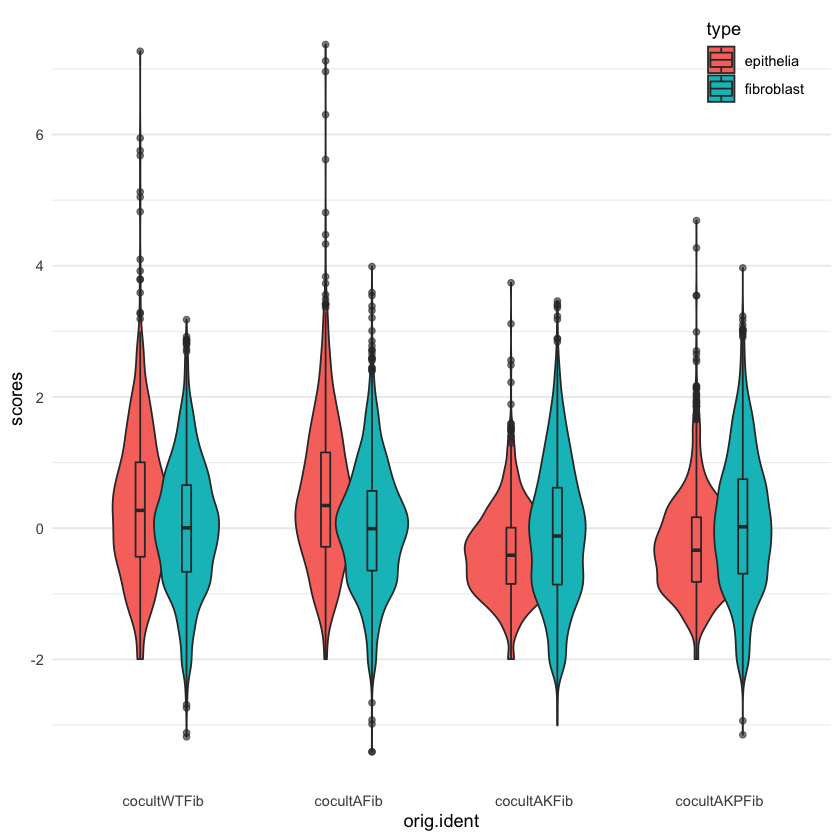

In [21]:
pd <- position_dodge(0.5)

pVln_LRscores <- ggplot(dLRscores_scale, aes(x=orig.ident, y=scores)) +
                    geom_violin(width=1, aes(fill=type), position = pd)+
                    geom_boxplot(width=0.1, alpha=0.6, position = pd, 
                        aes(fill=type))+
                    # scale_fill_manual(values=c("#669966","#666633", "#336699", "#3366CC"))
                    theme_minimal() + 
                    theme(
                        legend.position = c(.98, 1),
                            legend.justification = c("right", "top"),
                            legend.box.just = "right",
                            legend.margin = margin(6, 6, 6, 6),
                            panel.grid.major.x = element_blank()
                        )
pVln_LRscores

In [31]:
ggsave(pVln_LRscores, filename = "pVln_LRscores.pdf", height = 8, width = 10, dpi = 600)

In [22]:
library(ggstatsplot)

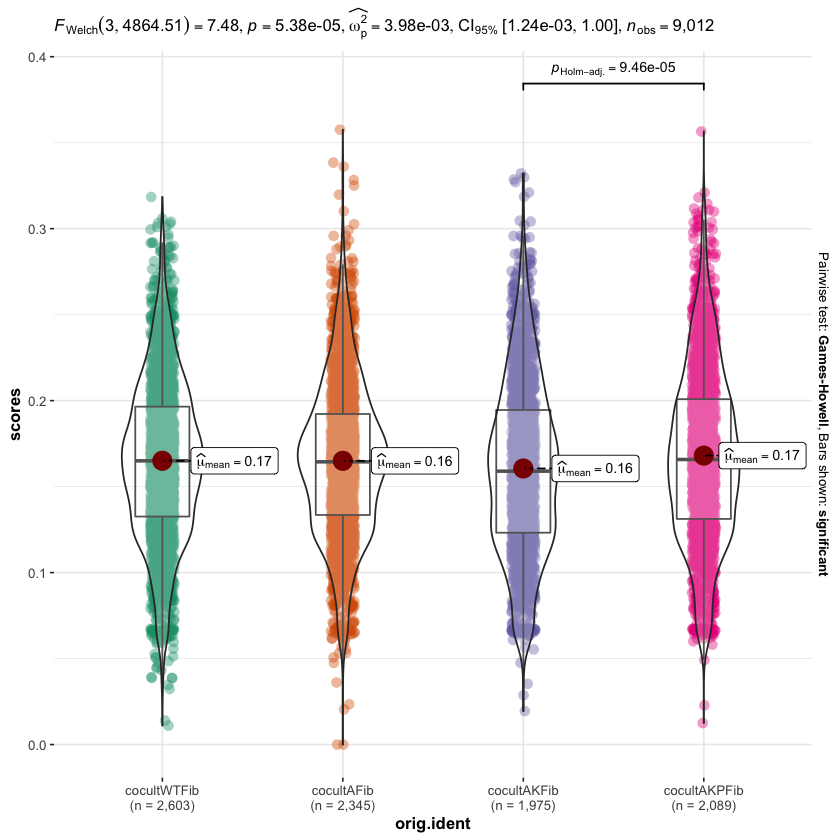

In [28]:
ggstatsplot::ggbetweenstats(data = filter(.data=dLRscores, type=="fibroblast"), 
    x=orig.ident, 
    y=scores,
    )
ggsave(filename = "pVln_LRscores_FIB.pdf", height = 8, width = 10, dpi = 600)

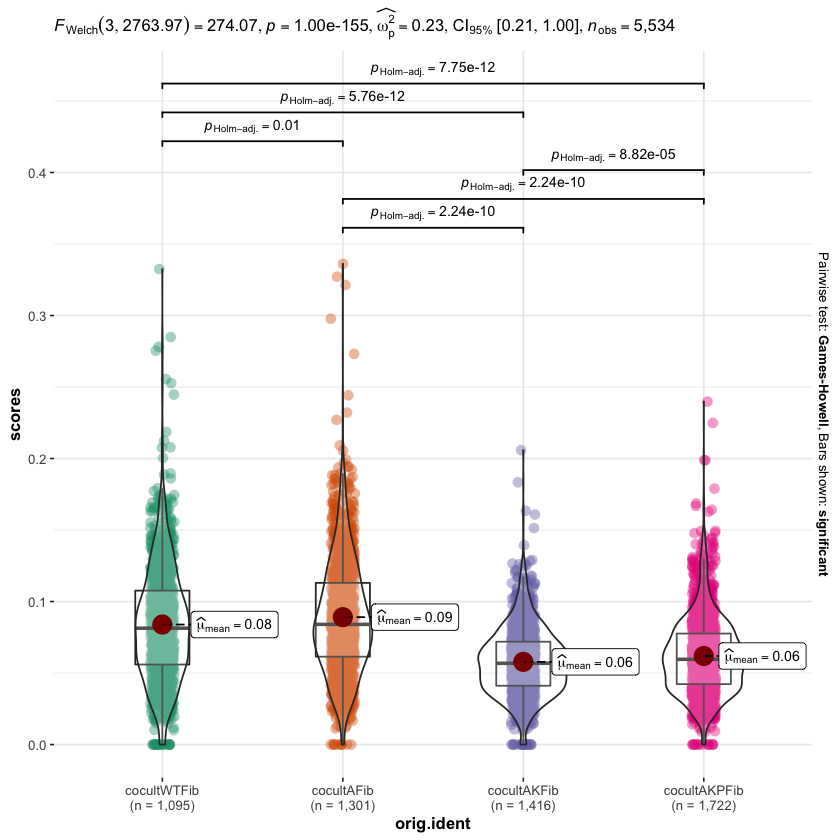

In [29]:
ggstatsplot::ggbetweenstats(data = filter(.data=dLRscores, type=="epithelia"), 
    x=orig.ident, 
    y=scores,
    )
ggsave(filename = "pVln_LRscores_EPI.pdf", height = 8, width = 10, dpi = 600)

# Save data

In [25]:
saveRDS(INTccWT, "../RData/INTccWT.rds")

In [8]:
INTccWT <- readRDS("../RData/INTccWT.rds")

In [26]:
saveRDS(dLRscores, "../RData/dLRscores.rds")

In [27]:
saveRDS(dLRscores_scale, "../RData/dLRscores_scale.rds")

In [2]:
dLRscores <- readRDS("../RData/dLRscores.rds")

In [ ]:
dLRscores_scale <- readRDS("../RData/dLRscores_scale.rds")